In [ ]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

In [7]:
series_obj = Series(np.arange(8), index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6', 'row 7', 'row 8'])
series_obj

row 1    0
row 2    1
row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
row 8    7
dtype: int32

In [9]:
series_obj['row 7']

6

In [10]:
series_obj[[0, 7]]

row 1    0
row 8    7
dtype: int32

In [13]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape(6, 6)),
index=['row 1', 'row 2', 'row 3', 'row 4', 'row 5', 'row 6', 'row 7', 'row 8'],
columns=['column 1', 'column 2', 'column 3', 'column 4', 'column 5', 'column 6', 'column 7', 'column 8']
DF_obj

(          0         1         2         3         4         5
 0  0.870124  0.582277  0.278839  0.185911  0.411100  0.117376
 1  0.684969  0.437611  0.556229  0.367080  0.402366  0.113041
 2  0.447031  0.585445  0.161985  0.520719  0.326051  0.699186
 3  0.366395  0.836375  0.481343  0.516502  0.383048  0.997541
 4  0.514244  0.559053  0.034450  0.719930  0.421004  0.436935
 5  0.281701  0.900274  0.669612  0.456069  0.289804  0.525819,)

In [1]:
DF_obj.loc[['row 2', 'row 5'], ['column 5', 'column 2']]

NameError: name 'DF_obj' is not defined

# Data Slicing

In [19]:
 series_obj['row 3': 'row 7']

row 3    2
row 4    3
row 5    4
row 6    5
row 7    6
dtype: int32

# Comparing with Scalars

In [94]:
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [95]:
DF_obj < 15

,0,1,2,3,4,5
0,True,True,True,True,True,True
1,True,True,True,True,True,True
2,True,True,True,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
5,False,False,False,False,False,False


# Filtering with Scalars

In [25]:
series_obj[series_obj > 6]

row 8    7
dtype: int32

# Setting values with Scalars

In [26]:
series_obj['row 1', 'row 5', 'row 8'] = 8
series_obj

row 1    8
row 2    1
row 3    2
row 4    3
row 5    8
row 6    5
row 7    6
row 8    8
dtype: int32

# Figuring out what data is missing

In [27]:
missing = np.nan
series_obj = Series(['row 1', 'row 2', missing, 'row 4', 'row 5', 'row 6', missing, 'row 8'])
series_obj

0    row 1
1    row 2
2      NaN
3    row 4
4    row 5
5    row 6
6      NaN
7    row 8
dtype: object

In [28]:
series_obj.isnull()

0    False
1    False
2     True
3    False
4    False
5    False
6     True
7    False
dtype: bool

# Filling in for missing values

In [29]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape(6, 6))
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.113041
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.699186
3,0.366395,0.836375,0.481343,0.516502,0.383048,0.997541
4,0.514244,0.559053,0.034450,0.719930,0.421004,0.436935
5,0.281701,0.900274,0.669612,0.456069,0.289804,0.525819


In [30]:
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [32]:
filled_DF = DF_obj.fillna(0)
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.000000
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.000000
3,0.000000,0.836375,0.481343,0.516502,0.383048,0.000000
4,0.000000,0.559053,0.034450,0.719930,0.421004,0.000000
5,0.000000,0.900274,0.669612,0.456069,0.289804,0.525819


In [33]:
filled_DF = DF_obj.fillna({0: 0.1, 5: 1.25})
filled_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,1.250000
2,0.447031,0.585445,0.161985,0.520719,0.326051,1.250000
3,0.100000,0.836375,0.481343,0.516502,0.383048,1.250000
4,0.100000,0.559053,0.034450,0.719930,0.421004,1.250000
5,0.100000,0.900274,0.669612,0.456069,0.289804,0.525819


In [34]:
fill_DF = DF_obj.fillna(method = 'ffill')
fill_DF

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,0.117376
2,0.447031,0.585445,0.161985,0.520719,0.326051,0.117376
3,0.447031,0.836375,0.481343,0.516502,0.383048,0.117376
4,0.447031,0.559053,0.034450,0.719930,0.421004,0.117376
5,0.447031,0.900274,0.669612,0.456069,0.289804,0.525819


# Counting missing values

In [35]:
np.random.seed(25)
DF_obj = DataFrame(np.random.rand(36).reshape(6, 6))
DF_obj.loc[3:5, 0] = missing
DF_obj.loc[1:4, 5] = missing
DF_obj

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.411100,0.117376
1,0.684969,0.437611,0.556229,0.367080,0.402366,NaN
2,0.447031,0.585445,0.161985,0.520719,0.326051,NaN
3,NaN,0.836375,0.481343,0.516502,0.383048,NaN
4,NaN,0.559053,0.034450,0.719930,0.421004,NaN
5,NaN,0.900274,0.669612,0.456069,0.289804,0.525819


In [36]:
DF_obj.isnull().sum()

0    3
1    0
2    0
3    0
4    0
5    4
dtype: int64

# Filtering out missing values

In [37]:
#Droping rows containing NaN

DF_no_NaN = DF_obj.dropna()
DF_no_NaN

,0,1,2,3,4,5
0,0.870124,0.582277,0.278839,0.185911,0.4111,0.117376


In [38]:
#Droping columns containing NaN

DF_no_NaN = DF_obj.dropna(axis=1)
DF_no_NaN

,1,2,3,4
0,0.582277,0.278839,0.185911,0.411100
1,0.437611,0.556229,0.367080,0.402366
2,0.585445,0.161985,0.520719,0.326051
3,0.836375,0.481343,0.516502,0.383048
4,0.559053,0.034450,0.719930,0.421004
5,0.900274,0.669612,0.456069,0.289804


# Chapter 2 - Data Preparation Basics

## Removing Duplicates 

In [23]:
DF_obj = DataFrame({'column 1':[1, 1, 2,2,3,3,3], 
                    'column 2':['a', 'a', 'b', 'b', 'c', 'c', 'c'], 
                    'column 3':['A', 'A', 'B', 'B', 'C', 'C', 'C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,C
6,3,c,C


In [44]:
DF_obj.duplicated()

0    False
1     True
2    False
3     True
4    False
5     True
6     True
dtype: bool

In [45]:
DF_obj.drop_duplicates()

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C


In [29]:
DF_obj = DataFrame({'column 1':[1, 1, 2,2,3,3,3], 
                    'column 2':['a', 'a', 'b', 'b', 'c', 'c', 'c'], 
                    'column 3':['A', 'A', 'B', 'B', 'C', 'D', 'C']})
DF_obj

,column 1,column 2,column 3
0,1,a,A
1,1,a,A
2,2,b,B
3,2,b,B
4,3,c,C
5,3,c,D
6,3,c,C


In [48]:
# duplicates from column 3 are removed
DF_obj.drop_duplicates(['column 3'])

,column 1,column 2,column 3
0,1,a,A
2,2,b,B
4,3,c,C
5,3,c,D


## Concatenating and transforming data

In [31]:
DF_obj = pd.DataFrame(np.arange(36).reshape(6, 6))
DF_obj

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [51]:
DF_obj_2 = pd.DataFrame(np.arange(15).reshape(5, 3))
DF_obj_2

,0,1,2
0,0,1,2
1,3,4,5
2,6,7,8
3,9,10,11
4,12,13,14


## Concatenating Data

In [54]:
# concatenated based on row indices
pd.concat([DF_obj, DF_obj_2], axis=1)

,0,1,2,3,4,5,0,1,2
0,0,1,2,3,4,5,0.0,1.0,2.0
1,6,7,8,9,10,11,3.0,4.0,5.0
2,12,13,14,15,16,17,6.0,7.0,8.0
3,18,19,20,21,22,23,9.0,10.0,11.0
4,24,25,26,27,28,29,12.0,13.0,14.0
5,30,31,32,33,34,35,NaN,NaN,NaN


In [55]:
# concatenated based on column indices
pd.concat([DF_obj, DF_obj_2])

,0,1,2,3,4,5
0,0,1,2,3.0,4.0,5.0
1,6,7,8,9.0,10.0,11.0
2,12,13,14,15.0,16.0,17.0
3,18,19,20,21.0,22.0,23.0
4,24,25,26,27.0,28.0,29.0
5,30,31,32,33.0,34.0,35.0
0,0,1,2,NaN,NaN,NaN
1,3,4,5,NaN,NaN,NaN
2,6,7,8,NaN,NaN,NaN
3,9,10,11,NaN,NaN,NaN


## Transforming Data

### Dropping Data

In [32]:
# rows 0 & 2 are dropped

DF_obj.drop([0, 2])

,0,1,2,3,4,5
1,6,7,8,9,10,11
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


In [33]:
# columns 0 & 2 are dropped

DF_obj.drop([0, 2], axis=1)

,1,3,4,5
0,1,3,4,5
1,7,9,10,11
2,13,15,16,17
3,19,21,22,23
4,25,27,28,29
5,31,33,34,35


### Adding Data

In [62]:
series_obj = Series(np.arange(6))
series_obj.name = "added_variable"
series_obj

0    0
1    1
2    2
3    3
4    4
5    5
Name: added_variable, dtype: int32

In [63]:
variable_added = DataFrame.join(DF_obj, series_obj)
variable_added

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5


In [68]:
added_datatable = variable_added.append(variable_added, ignore_index=False)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3


In [69]:
added_datatable = variable_added.append(variable_added, ignore_index=True)
added_datatable

,0,1,2,3,4,5,added_variable
0,0,1,2,3,4,5,0
1,6,7,8,9,10,11,1
2,12,13,14,15,16,17,2
3,18,19,20,21,22,23,3
4,24,25,26,27,28,29,4
5,30,31,32,33,34,35,5
6,0,1,2,3,4,5,0
7,6,7,8,9,10,11,1
8,12,13,14,15,16,17,2
9,18,19,20,21,22,23,3


### Sort Data

In [73]:
DF_sorted = DF_obj.sort_values(by=(5), ascending=[False])
DF_sorted

,0,1,2,3,4,5
5,30,31,32,33,34,35
4,24,25,26,27,28,29
3,18,19,20,21,22,23
2,12,13,14,15,16,17
1,6,7,8,9,10,11
0,0,1,2,3,4,5


In [75]:
DF_sorted = DF_obj.sort_values(by=(5), ascending=[True])
DF_sorted

,0,1,2,3,4,5
0,0,1,2,3,4,5
1,6,7,8,9,10,11
2,12,13,14,15,16,17
3,18,19,20,21,22,23
4,24,25,26,27,28,29
5,30,31,32,33,34,35


## Grouping and Data Aggregation

### Grouping Data by column index

In [23]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.9,2.6,16.5,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.9,2.9,17.0,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.9,2.3,18.6,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.1,3.2,19.4,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.1,3.4,17.0,0,0,3,2


In [84]:
cars_groups = cars.groupby(cars['cyl'])
cars_groups.mean()

,mpg,disp,hp,drat,wt,qsec,vs,am,gear,carb
cyl,,,,,,,,,,
4,26.663636,105.136364,82.636364,4.070909,2.285727,19.137273,0.909091,0.727273,4.090909,1.545455
6,19.742857,183.314286,122.285714,3.585714,3.117143,17.977143,0.571429,0.428571,3.857143,3.428571
8,15.100000,353.100000,209.214286,3.229286,3.999214,16.772143,0.000000,0.142857,3.285714,3.500000


In [83]:
cars_groups = cars.groupby(cars['am'])
cars_groups.mean()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,gear,carb
am,,,,,,,,,,
0,17.147368,6.947368,290.378947,160.263158,3.286316,3.768895,18.183158,0.368421,3.210526,2.736842
1,24.392308,5.076923,143.530769,126.846154,4.050000,2.411000,17.360000,0.538462,4.384615,2.923077


In [ ]:
"""df_1 = np.array([[1.,3.,4.],[2.,5.,2.],[0.,4.,1.]])
df_2 =np. array([[2.,1.],[0.,5.],[4.,7.]])
pd.concat([df_1, df_2], axis=1)

array([[1.,3.,4.],[2.,5.,2.],[0.,4.,1.],[2.,1.,NaN.],[0.,5.,NaN.],[4.,7.,NaN.]])
"""

# Chapter 4 - Practical Data Visualization

## Segment 1 - Creating Standard Data Graphics

In [5]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

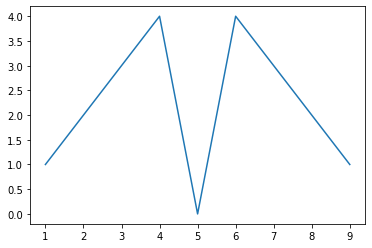

In [6]:
x = range(1, 10)
y = [1,2, 3, 4, 0, 4, 3, 2, 1]

plt.plot(x, y)

### Creating a line chart from list object

#### Plotting a line chart in matplotlib

In [9]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars['mpg']

<AxesSubplot:>

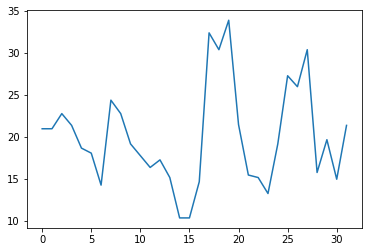

In [10]:
mpg.plot()

<AxesSubplot:>

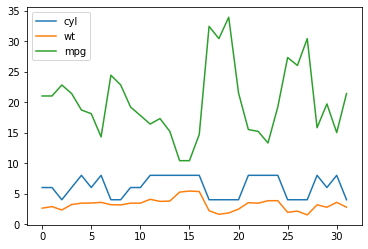

In [11]:
df = cars[['cyl', 'wt', 'mpg']]
df.plot()

## Creating bar charts

### Creating bar charts from a List

<BarContainer object of 9 artists>

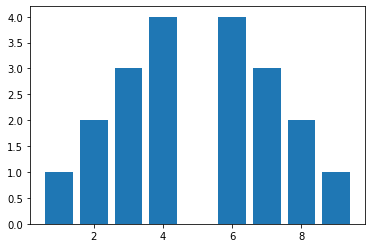

In [12]:
plt.bar(x, y)

### Creating bar charts from Pandas objects

<AxesSubplot:>

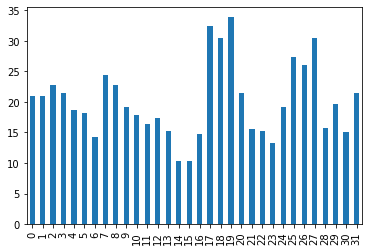

In [13]:
#mpg plotted vertically

mpg.plot(kind="bar")

<AxesSubplot:>

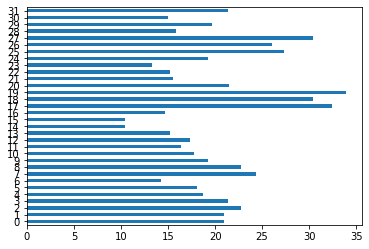

In [14]:
# mpg plotted horizontally

mpg.plot(kind="barh")

## Creating a pie chart

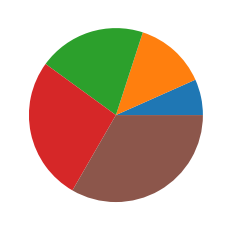

In [15]:
x = [1,2,3,4,0,5]
plt.pie(x)
plt.show()

## Saving a plot

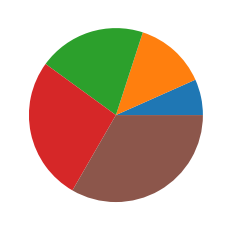

In [16]:
plt.pie(x)
plt.savefig('pie_chart.png')
plt.show()

In [17]:
%pwd

'C:\\Users\\User'

## Segment 2 - Defining elements of a plot

In [ ]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

### Defining axes, ticks and grids

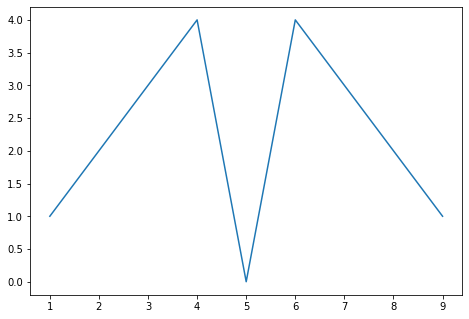

In [18]:
x = range(1, 10)
y = [1,2,3,4,0,4,3,2,1]

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.plot(x,y)

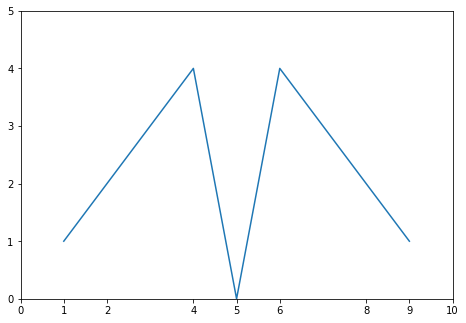

In [19]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.set_xticks([0,1,2,4,5,6,8,9,10])
ax.set_yticks([0,1,2,3,4,5])

ax.plot(x,y)

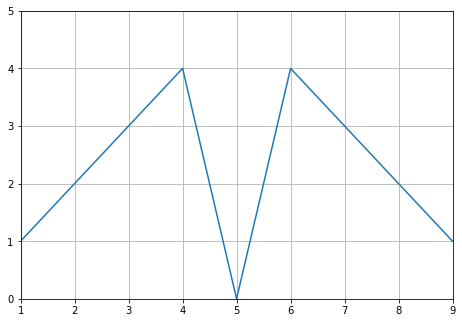

In [21]:
fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

ax.set_xlim([1,9])
ax.set_ylim([0,5])

ax.grid()
ax.plot(x,y)

### Generating multiple plots in one figure with subplots

<Figure size 432x288 with 0 Axes>

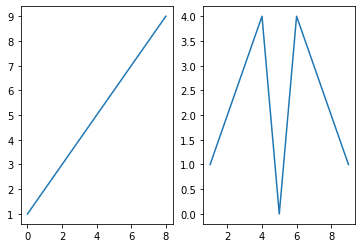

In [26]:
fig = plt.figure()
fig, (ax1, ax2) = plt.subplots(1, 2)

ax1.plot(x)
ax2.plot(x,y)

## Segment 3 - Plot Formatting

In [24]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [ ]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

### Defining plot color

<BarContainer object of 9 artists>

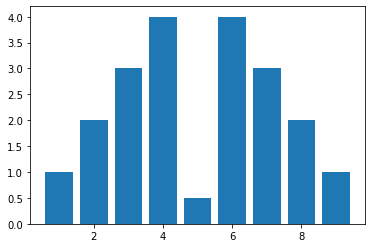

In [27]:
x = range(1, 10)
y = [1,2,3,4,0.5,4,3,2,1]

plt.bar(x, y)

<BarContainer object of 9 artists>

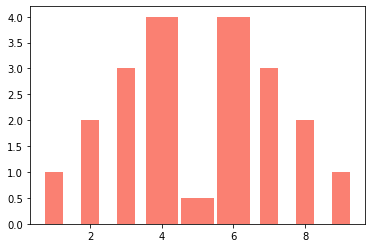

In [29]:
wide = [.5, .5, .5, .9, .9, .9, .5, .5, .5]
color = ['salmon']
plt.bar(x, y, width = wide, color=color, align='center')

<AxesSubplot:>

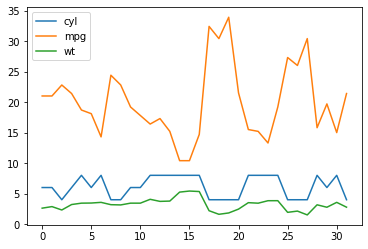

In [30]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'mpg', 'wt']]
df.plot()

<AxesSubplot:>

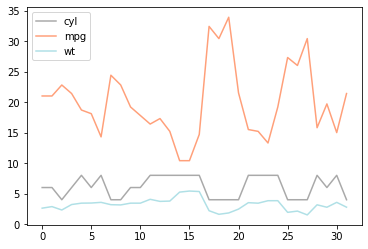

In [31]:
color_theme = ['darkgray', 'lightsalmon', 'powderblue']
df.plot(color=color_theme)

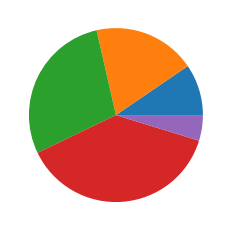

In [32]:
z = [1,2,3,4,.5]
plt.pie(z)
plt.show()

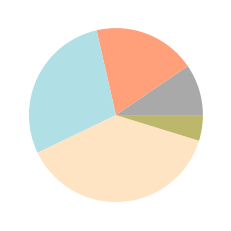

In [34]:
color_theme=['#A9A9A9', '#FFA07A', '#B0E0E6', '#FFE4C4','#BDB76B']
plt.pie(z, colors=color_theme)
plt.show()

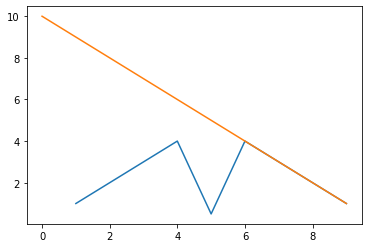

In [35]:
x1 = range(0,10)
y1 = [10,9,8,7,6,5,4,3,2,1]
plt.plot(x, y)
plt.plot(x1,y1)

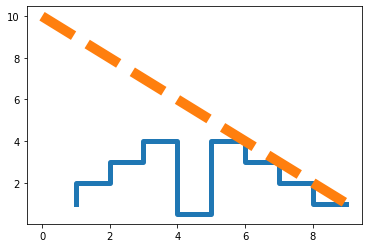

In [36]:
plt.plot(x, y, ds='steps', lw=5)
plt.plot(x1, y1, ls='--', lw=10)

### Setting Plot Markers

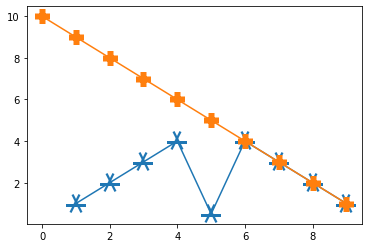

In [40]:
plt.plot(x,y, marker='1', mew=20)
plt.plot(x1, y1, marker='+', mew=15)

## segment 4 - Creating labels and annotations

In [2]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

## Labeling plot features

### The Functional method

Text(0, 0.5, 'your y-axis label')

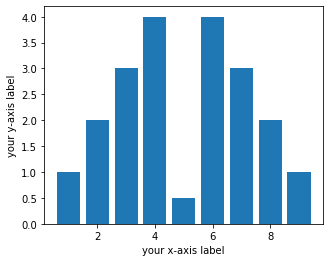

In [4]:
x = range(1,10)
y = [1,2,3,4,.5,4,3,2,1]
plt.bar(x,y)

plt.xlabel('your x-axis label')
plt.ylabel('your y-axis label')

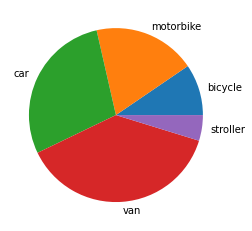

In [5]:
z = [1,2,3,4,.5]
veh_type = ['bicycle', 'motorbike', 'car', 'van', 'stroller']

plt.pie(z, labels=veh_type)
plt.show()

Text(0, 0.5, 'miles/gal')

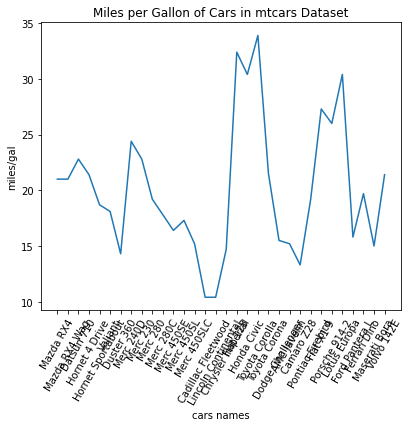

In [8]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('cars names')
ax.set_ylabel('miles/gal')

## Adding a legend to your plot

### The Functional Method

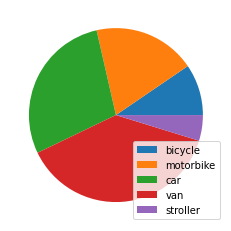

In [9]:
plt.pie(z)
plt.legend(veh_type, loc='best')
plt.show()

### The object-oriented method

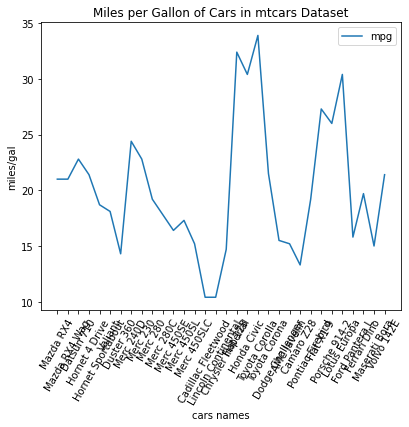

In [10]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('cars names')
ax.set_ylabel('miles/gal')

ax.legend(loc='best')

## Annotating your plot

In [11]:
mpg.max()

33.9

Text(21, 35, 'Toyota Corolla')

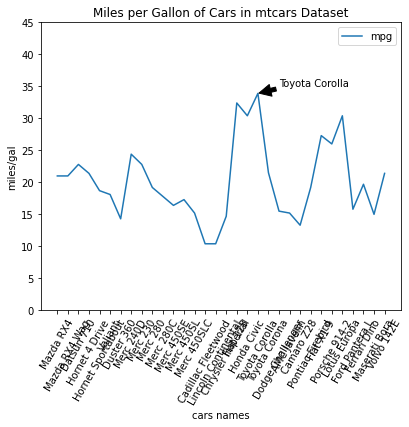

In [17]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

fig = plt.figure()
ax = fig.add_axes([.1,.1,1,1])

mpg.plot()

ax.set_xticks(range(32))

ax.set_xticklabels(cars.car_names, rotation=60, fontsize='medium')
ax.set_title('Miles per Gallon of Cars in mtcars Dataset')

ax.set_xlabel('cars names')
ax.set_ylabel('miles/gal')

ax.legend(loc='best')

ax.set_ylim([0,45])

ax.annotate('Toyota Corolla', xy=(19,33.9), xytext=(21,35),
           arrowprops=dict(facecolor='black', shrink=0.05))

## segment 5 - Visualizing Time Series

In [18]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [19]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

### The simplest time series plot

In [20]:
address = 'C:/Users/User/Exercise Files/Data/Superstore-Sales.csv'

df = pd.read_csv(address, index_col = 'Order Date', encoding='cp1252', parse_dates=True)
df.head()

,Row ID,Order ID,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Profit,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
Order Date,,,,,,,,,,,,,,,,,,,,
2010-10-13,1,3,Low,6,261.5400,0.04,Regular Air,-213.25,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/2010
2012-10-01,49,293,High,49,10123.0200,0.07,Delivery Truck,457.81,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/2012
2012-10-01,50,293,High,27,244.5700,0.01,Regular Air,46.71,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D® Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/2012
2011-07-10,80,483,High,30,4965.7595,0.08,Regular Air,1198.97,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/2011
2010-08-28,85,515,Not Specified,19,394.2700,0.08,Regular Air,30.94,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/2010


<AxesSubplot:xlabel='Order Date'>

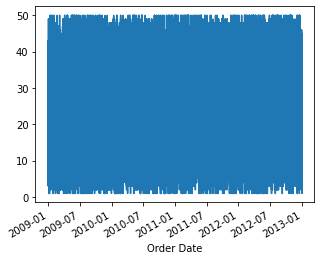

In [36]:
df['Order Quantity'].plot()

<AxesSubplot:title={'center':'Superstore Sales'}, xlabel='Order Date', ylabel='order Quantity'>

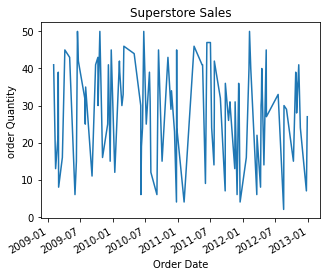

In [37]:
df2 = df.sample(n=100, random_state=25, axis=0)

plt.xlabel('order Data')
plt.ylabel('order Quantity')
plt.title('Superstore Sales')

df2['Order Quantity'].plot()

## Segment 6 - Creating statistical data graphics

In [38]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams

In [39]:
%matplotlib inline
rcParams['figure.figsize']= 5,4

In [40]:
import seaborn as sb
sb.set_style('whitegrid')

### Eyeballing dataset distributions with histograms

<AxesSubplot:ylabel='Frequency'>

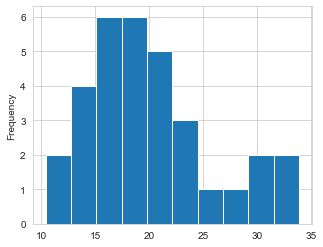

In [44]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

cars.index = cars.car_names

mpg = cars['mpg']

mpg.plot(kind='hist')

[]

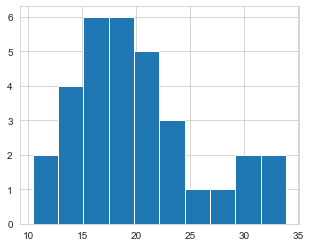

In [45]:
plt.hist(mpg)
plt.plot()

e:\study\python\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mpg', ylabel='Density'>

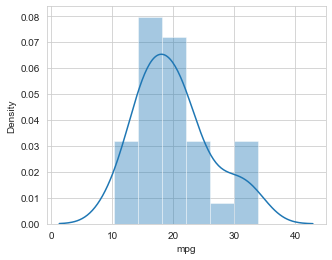

In [48]:
# using seaborn

sb.distplot(mpg)

### Seeing scatterplots in action

<AxesSubplot:xlabel='hp', ylabel='mpg'>

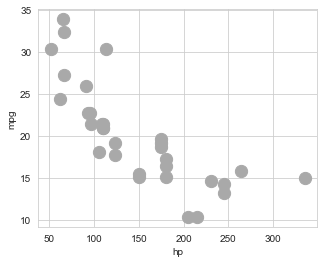

In [51]:
cars.plot(kind='scatter', x='hp', y='mpg', c=['darkgray'], s=150)

<AxesSubplot:xlabel='hp', ylabel='mpg'>

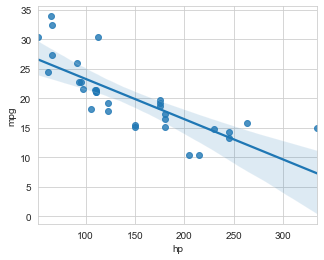

In [52]:
# using seaborn

sb.regplot(x='hp', y='mpg', data=cars, scatter=True)

### Generating a scatter plot matrix

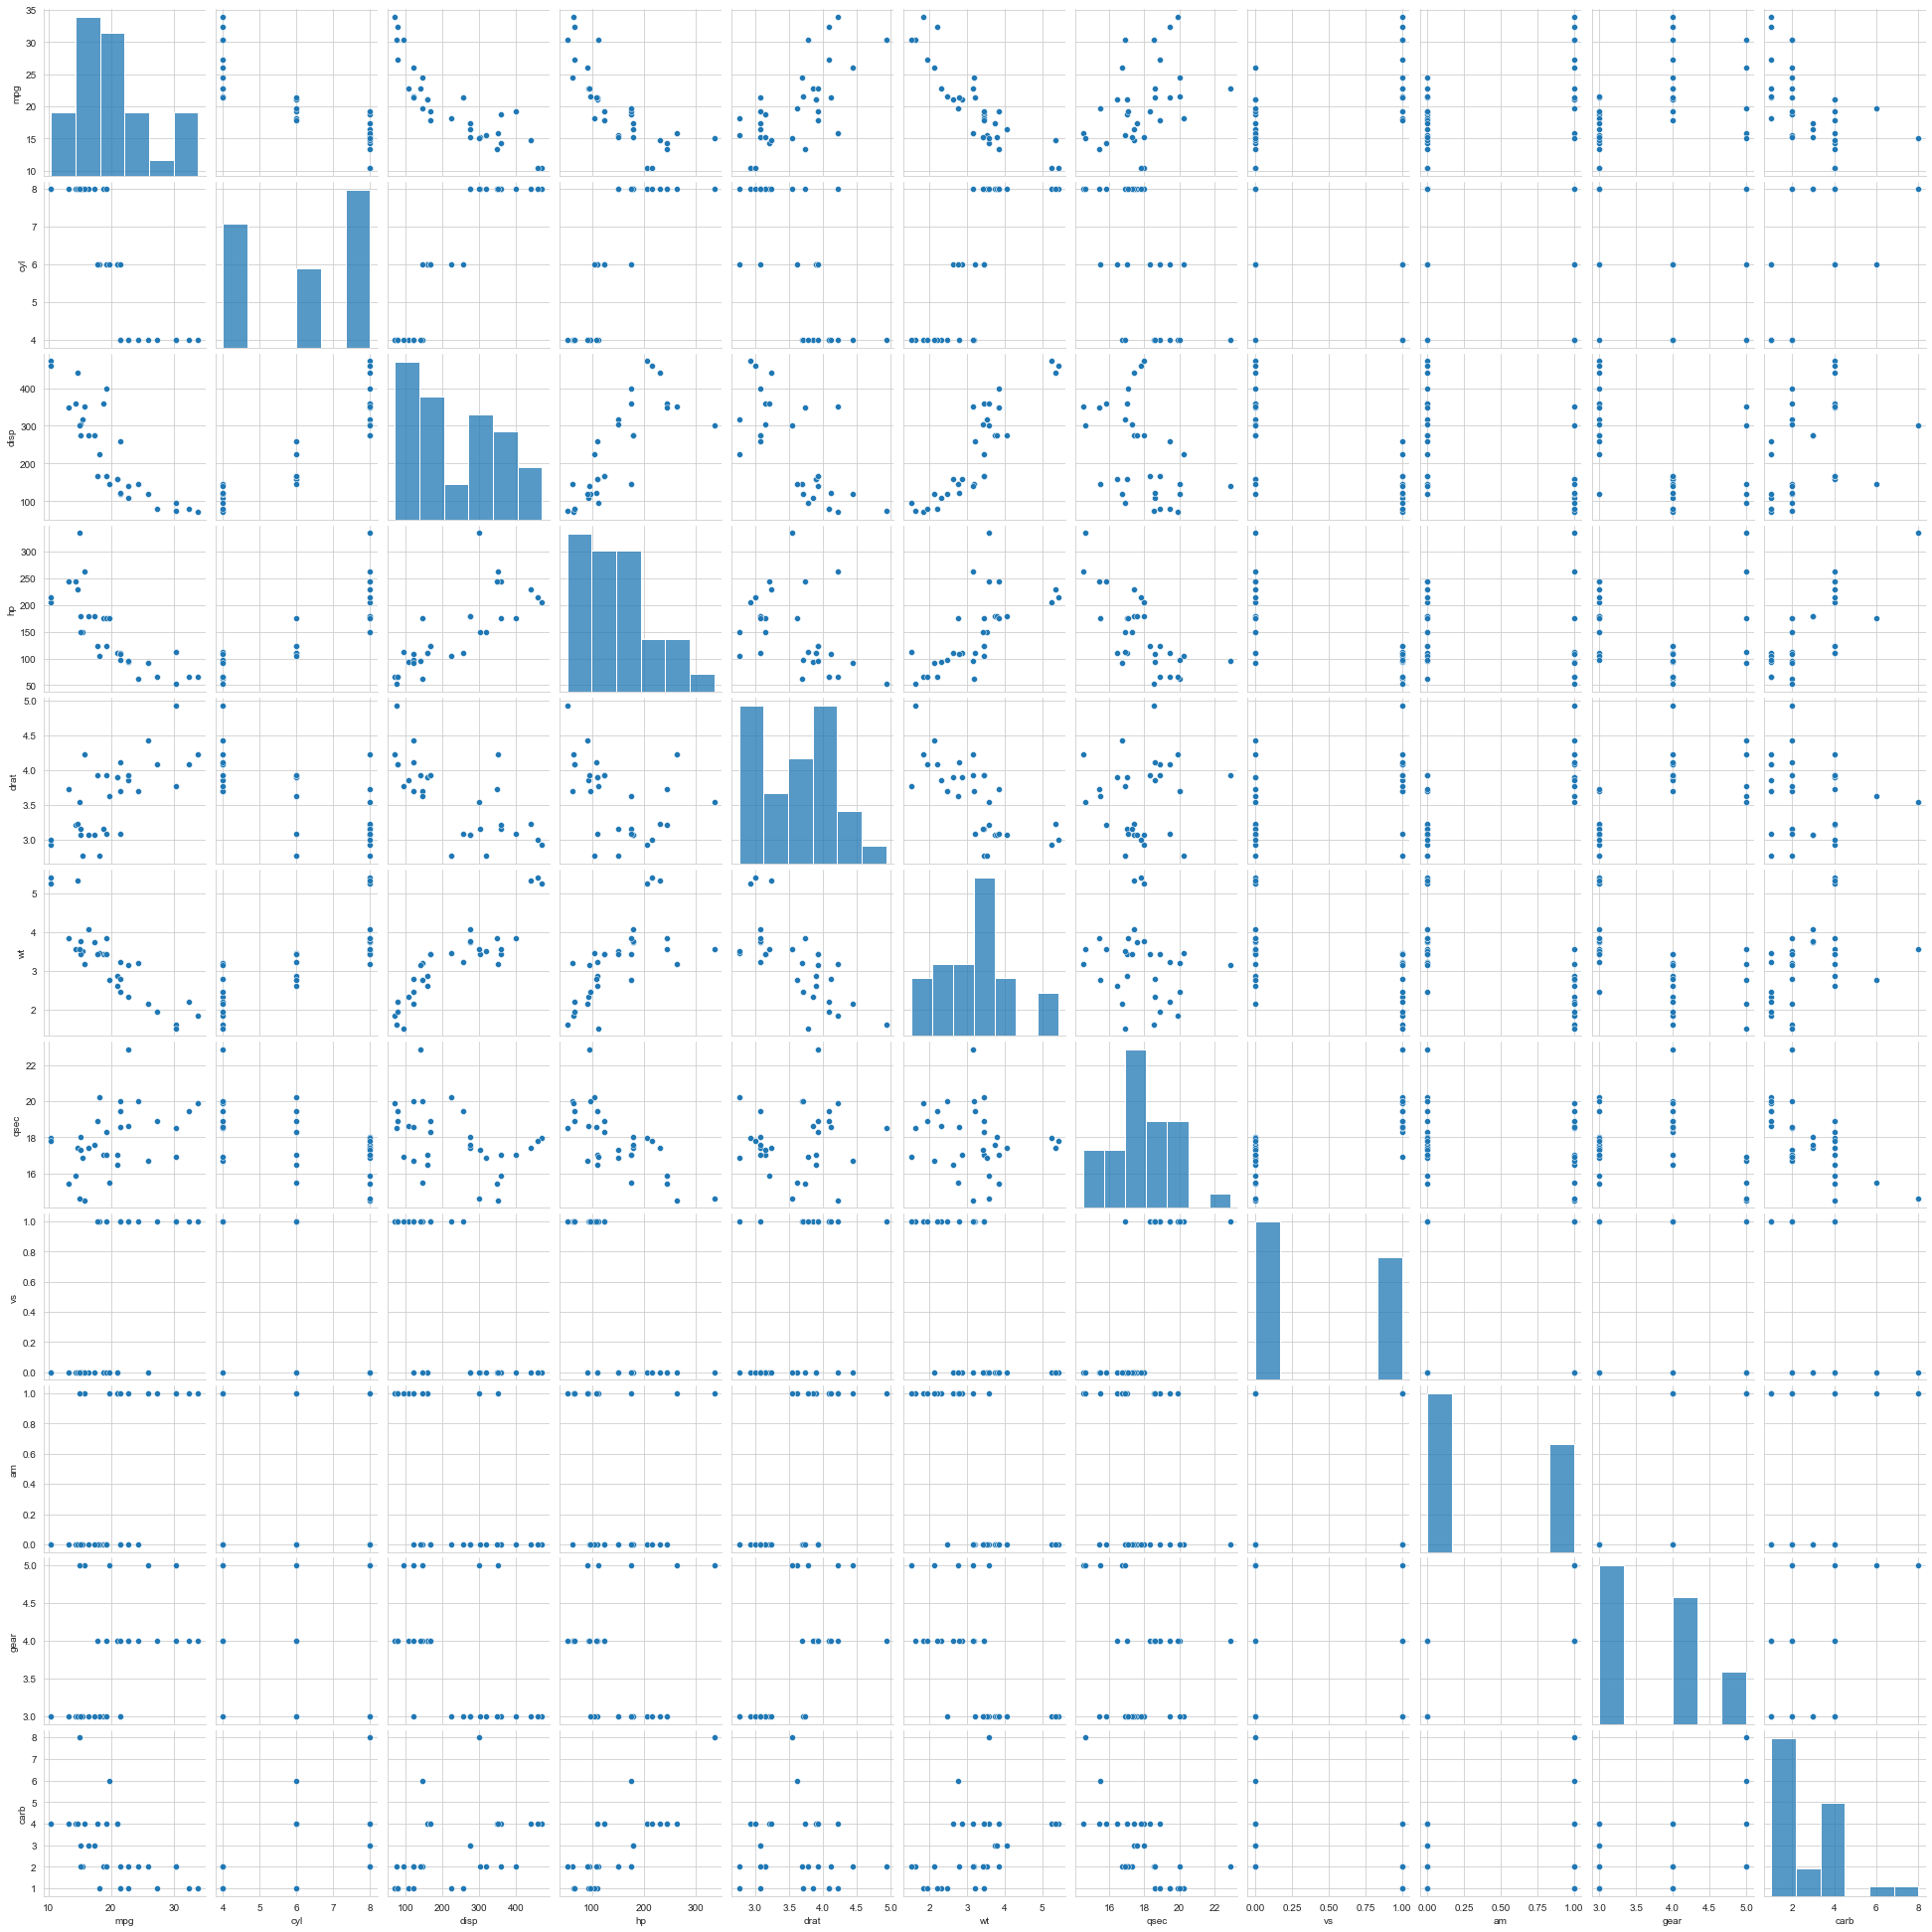

In [53]:
sb.pairplot(cars)

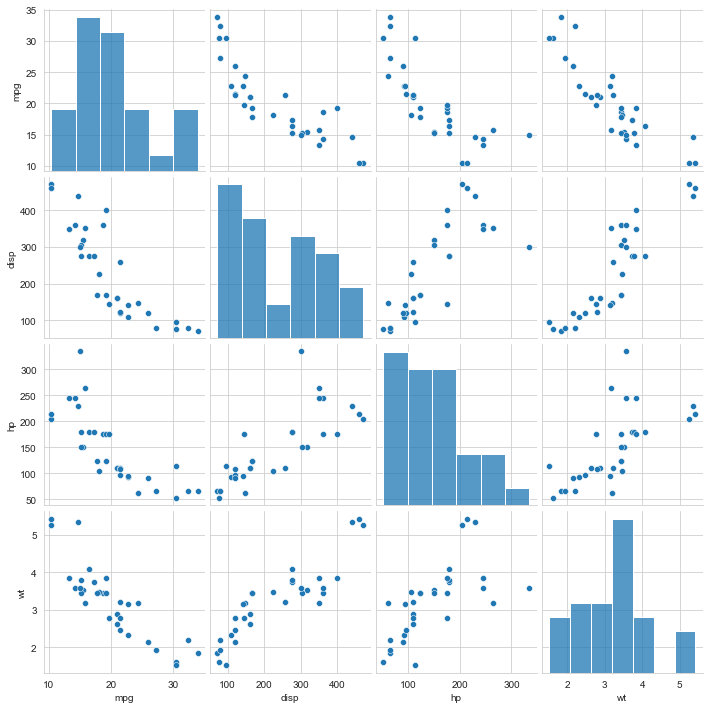

In [54]:
# using seaborn

cars_subset = cars[['mpg', 'disp', 'hp', 'wt']]
sb.pairplot(cars_subset)
plt.show()

### Building boxplots

<AxesSubplot:title={'center':'wt'}, xlabel='am'>

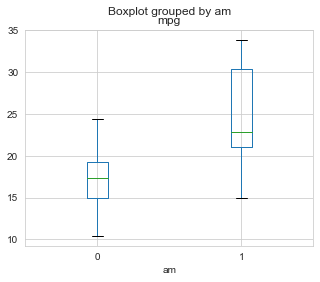

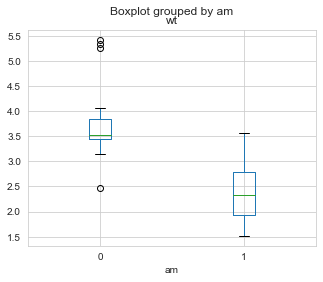

In [55]:
cars.boxplot(column='mpg', by='am')
cars.boxplot(column='wt', by='am')

<AxesSubplot:xlabel='am', ylabel='mpg'>

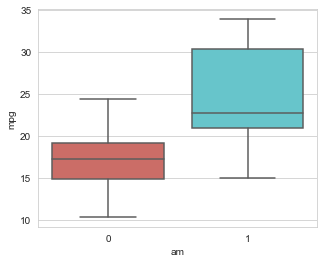

In [56]:
# using seaborn

sb.boxplot(x='am', y='mpg', data=cars, palette='hls')

# Basic Math and Statistics

## segment 1 - using numpy to perform arithmetic operations on data

In [57]:
import numpy as np
from numpy.random import randn

In [58]:
np.set_printoptions(precision=2)

## Creating arrays

### creating arrays using a list

In [59]:
a = np.array([1,2,3,4,5,6])
a

array([1, 2, 3, 4, 5, 6])

In [60]:
b = np.array([[10,20,30],[45,50,60]])
b

array([[10, 20, 30],
       [45, 50, 60]])

### Creating array via assignment

In [62]:
np.random.seed(25)
c = 36*np.random.randn(6)
c

array([  8.22,  36.97, -30.23, -21.28, -34.45,  -8.  ])

In [64]:
d = np.arange(1, 35)
d

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34])

## Performing arithmetic on arrays

In [65]:
a*10

array([10, 20, 30, 40, 50, 60])

In [66]:
c + a

array([  9.22,  38.97, -27.23, -17.28, -29.45,  -2.  ])

In [67]:
c - a

array([  7.22,  34.97, -33.23, -25.28, -39.45, -14.  ])

In [68]:
c*a

array([   8.22,   73.94,  -90.68,  -85.13, -172.24,  -48.02])

In [69]:
c/a

array([  8.22,  18.48, -10.08,  -5.32,  -6.89,  -1.33])

## sement 2 - Multiplying matrices and Basic linear algebra

In [70]:
import numpy as np
from numpy.random import randn

In [71]:
np.set_printoptions(precision=2)

### Multiplying matrices and Basic linear algebra

In [72]:
aa = np.array([[2,4,6],[1,3,5],[10,20,30]])
aa

array([[ 2,  4,  6],
       [ 1,  3,  5],
       [10, 20, 30]])

In [73]:
bb = np.array([[0.,1.,2.],[3.,4.,5.],[6.,7.,8.]])
bb

array([[0., 1., 2.],
       [3., 4., 5.],
       [6., 7., 8.]])

In [74]:
aa*bb

array([[  0.,   4.,  12.],
       [  3.,  12.,  25.],
       [ 60., 140., 240.]])

In [75]:
np.dot(aa, bb)

array([[ 48.,  60.,  72.],
       [ 39.,  48.,  57.],
       [240., 300., 360.]])

## Segment 3 - Generating summary statistics using pandas and scipy

In [76]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import scipy
from scipy import stats

In [77]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'

cars = pd.read_csv(address)
cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Looking at summary statistics that describe a variable's numeric values

In [78]:
cars.sum()

car_names    Mazda RX4Mazda RX4 WagDatsun 710Hornet 4 Drive...
mpg                                                      642.9
cyl                                                        198
disp                                                    7383.1
hp                                                        4694
drat                                                    115.09
wt                                                     102.952
qsec                                                    571.16
vs                                                          14
am                                                          13
gear                                                       118
carb                                                        90
dtype: object

In [79]:
cars.sum(axis=1)

0     328.980
1     329.795
2     259.580
3     426.135
4     590.310
5     385.540
6     656.920
7     270.980
8     299.570
9     350.460
10    349.660
11    510.740
12    511.500
13    509.850
14    728.560
15    726.644
16    725.695
17    213.850
18    195.165
19    206.955
20    273.775
21    519.650
22    506.085
23    646.280
24    631.175
25    208.215
26    272.570
27    273.683
28    670.690
29    379.590
30    694.710
31    288.890
dtype: float64

In [80]:
cars.median()

mpg      19.200
cyl       6.000
disp    196.300
hp      123.000
drat      3.695
wt        3.325
qsec     17.710
vs        0.000
am        0.000
gear      4.000
carb      2.000
dtype: float64

In [81]:
cars.mean()

mpg      20.090625
cyl       6.187500
disp    230.721875
hp      146.687500
drat      3.596563
wt        3.217250
qsec     17.848750
vs        0.437500
am        0.406250
gear      3.687500
carb      2.812500
dtype: float64

In [82]:
cars.max()

car_names    Volvo 142E
mpg                33.9
cyl                   8
disp                472
hp                  335
drat               4.93
wt                5.424
qsec               22.9
vs                    1
am                    1
gear                  5
carb                  8
dtype: object

In [84]:
cars.max(axis=1)

0     160.0
1     160.0
2     108.0
3     258.0
4     360.0
5     225.0
6     360.0
7     146.7
8     140.8
9     167.6
10    167.6
11    275.8
12    275.8
13    275.8
14    472.0
15    460.0
16    440.0
17     78.7
18     75.7
19     71.1
20    120.1
21    318.0
22    304.0
23    350.0
24    400.0
25     79.0
26    120.3
27    113.0
28    351.0
29    175.0
30    335.0
31    121.0
dtype: float64

In [86]:
# index number of maximum value found in mpg var

mpg = cars.mpg
mpg.idxmax()

19

### Looking at summary statistics that describe a variable distribution

In [88]:
# standard deviation

cars.std()

mpg       6.026948
cyl       1.785922
disp    123.938694
hp       68.562868
drat      0.534679
wt        0.978457
qsec      1.786943
vs        0.504016
am        0.498991
gear      0.737804
carb      1.615200
dtype: float64

In [89]:
# variance

cars.var()

mpg        36.324103
cyl         3.189516
disp    15360.799829
hp       4700.866935
drat        0.285881
wt          0.957379
qsec        3.193166
vs          0.254032
am          0.248992
gear        0.544355
carb        2.608871
dtype: float64

In [91]:
# number of cars having 3 gears is 15, 4 gears is 12 and 5 gears is 5

gear = cars.gear
gear.value_counts()

3    15
4    12
5     5
Name: gear, dtype: int64

In [93]:
# shows all descriptive statistics at once

cars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


## Segment 4 - Summarizing categorical data using pandas

In [94]:
import numpy as np
import pandas as pd

### The Basics

In [97]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']
cars.index = cars.car_names

cars.head(15) # shows first 15 set of data

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
car_names,,,,,,,,,,,,
Mazda RX4,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [100]:
# 10 cars having 4 carborators, 10 cars having 2 carborators etc

carb = cars.carb
carb.value_counts()

4    10
2    10
1     7
3     3
8     1
6     1
Name: carb, dtype: int64

In [103]:
cars_cat = cars[['cyl', 'vs', 'am', 'gear', 'carb']]
cars_cat.head()

,cyl,vs,am,gear,carb
car_names,,,,,
Mazda RX4,6,0,1,4,4
Mazda RX4 Wag,6,0,1,4,4
Datsun 710,4,1,1,4,1
Hornet 4 Drive,6,1,0,3,1
Hornet Sportabout,8,0,0,3,2


In [104]:
gears_group = cars_cat.groupby('gear')
gears_group.describe()

cyl                                                 vs            ...  \
     count      mean       std  min  25%  50%  75%  max count      mean  ...   
gear                                                                     ...   
3     15.0  7.466667  1.187234  4.0  8.0  8.0  8.0  8.0  15.0  0.200000  ...   
4     12.0  4.666667  0.984732  4.0  4.0  4.0  6.0  6.0  12.0  0.833333  ...   
5      5.0  6.000000  2.000000  4.0  4.0  6.0  8.0  8.0   5.0  0.200000  ...   

       am       carb                                               
      75%  max count      mean       std  min  25%  50%  75%  max  
gear                                                               
3     0.0  0.0  15.0  2.666667  1.175139  1.0  2.0  3.0  4.0  4.0  
4     1.0  1.0  12.0  2.333333  1.302678  1.0  1.0  2.0  4.0  4.0  
5     1.0  1.0   5.0  4.400000  2.607681  2.0  2.0  4.0  6.0  8.0  

[3 rows x 32 columns]

### Transforming variables to categorical data type

In [105]:
cars['group'] = pd.Series(cars.gear, dtype="category")

In [106]:
cars['group'].dtypes

CategoricalDtype(categories=[3, 4, 5], ordered=False)

In [107]:
cars['group'].value_counts()

3    15
4    12
5     5
Name: group, dtype: int64

### Describing categorical data with crosstabs

In [110]:
pd.crosstab(cars['am'], cars['gear'])

# cars with manual transmission are most likely to have 3 gears and those
# with automatic transmission are likely to have 5 gears

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


## Segment 5 - Starting with parametric methods in pandas and scipy

In [111]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats.stats import pearsonr

In [112]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
plt.style.use('seaborn-whitegrid')

### The Pearson Correlation

In [113]:
"""
ASSUMPTIONS OF PEARSON CORRELATION
Normally distributed - giving a bell curve
Linearly related
continuous, numeric values
"""


address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

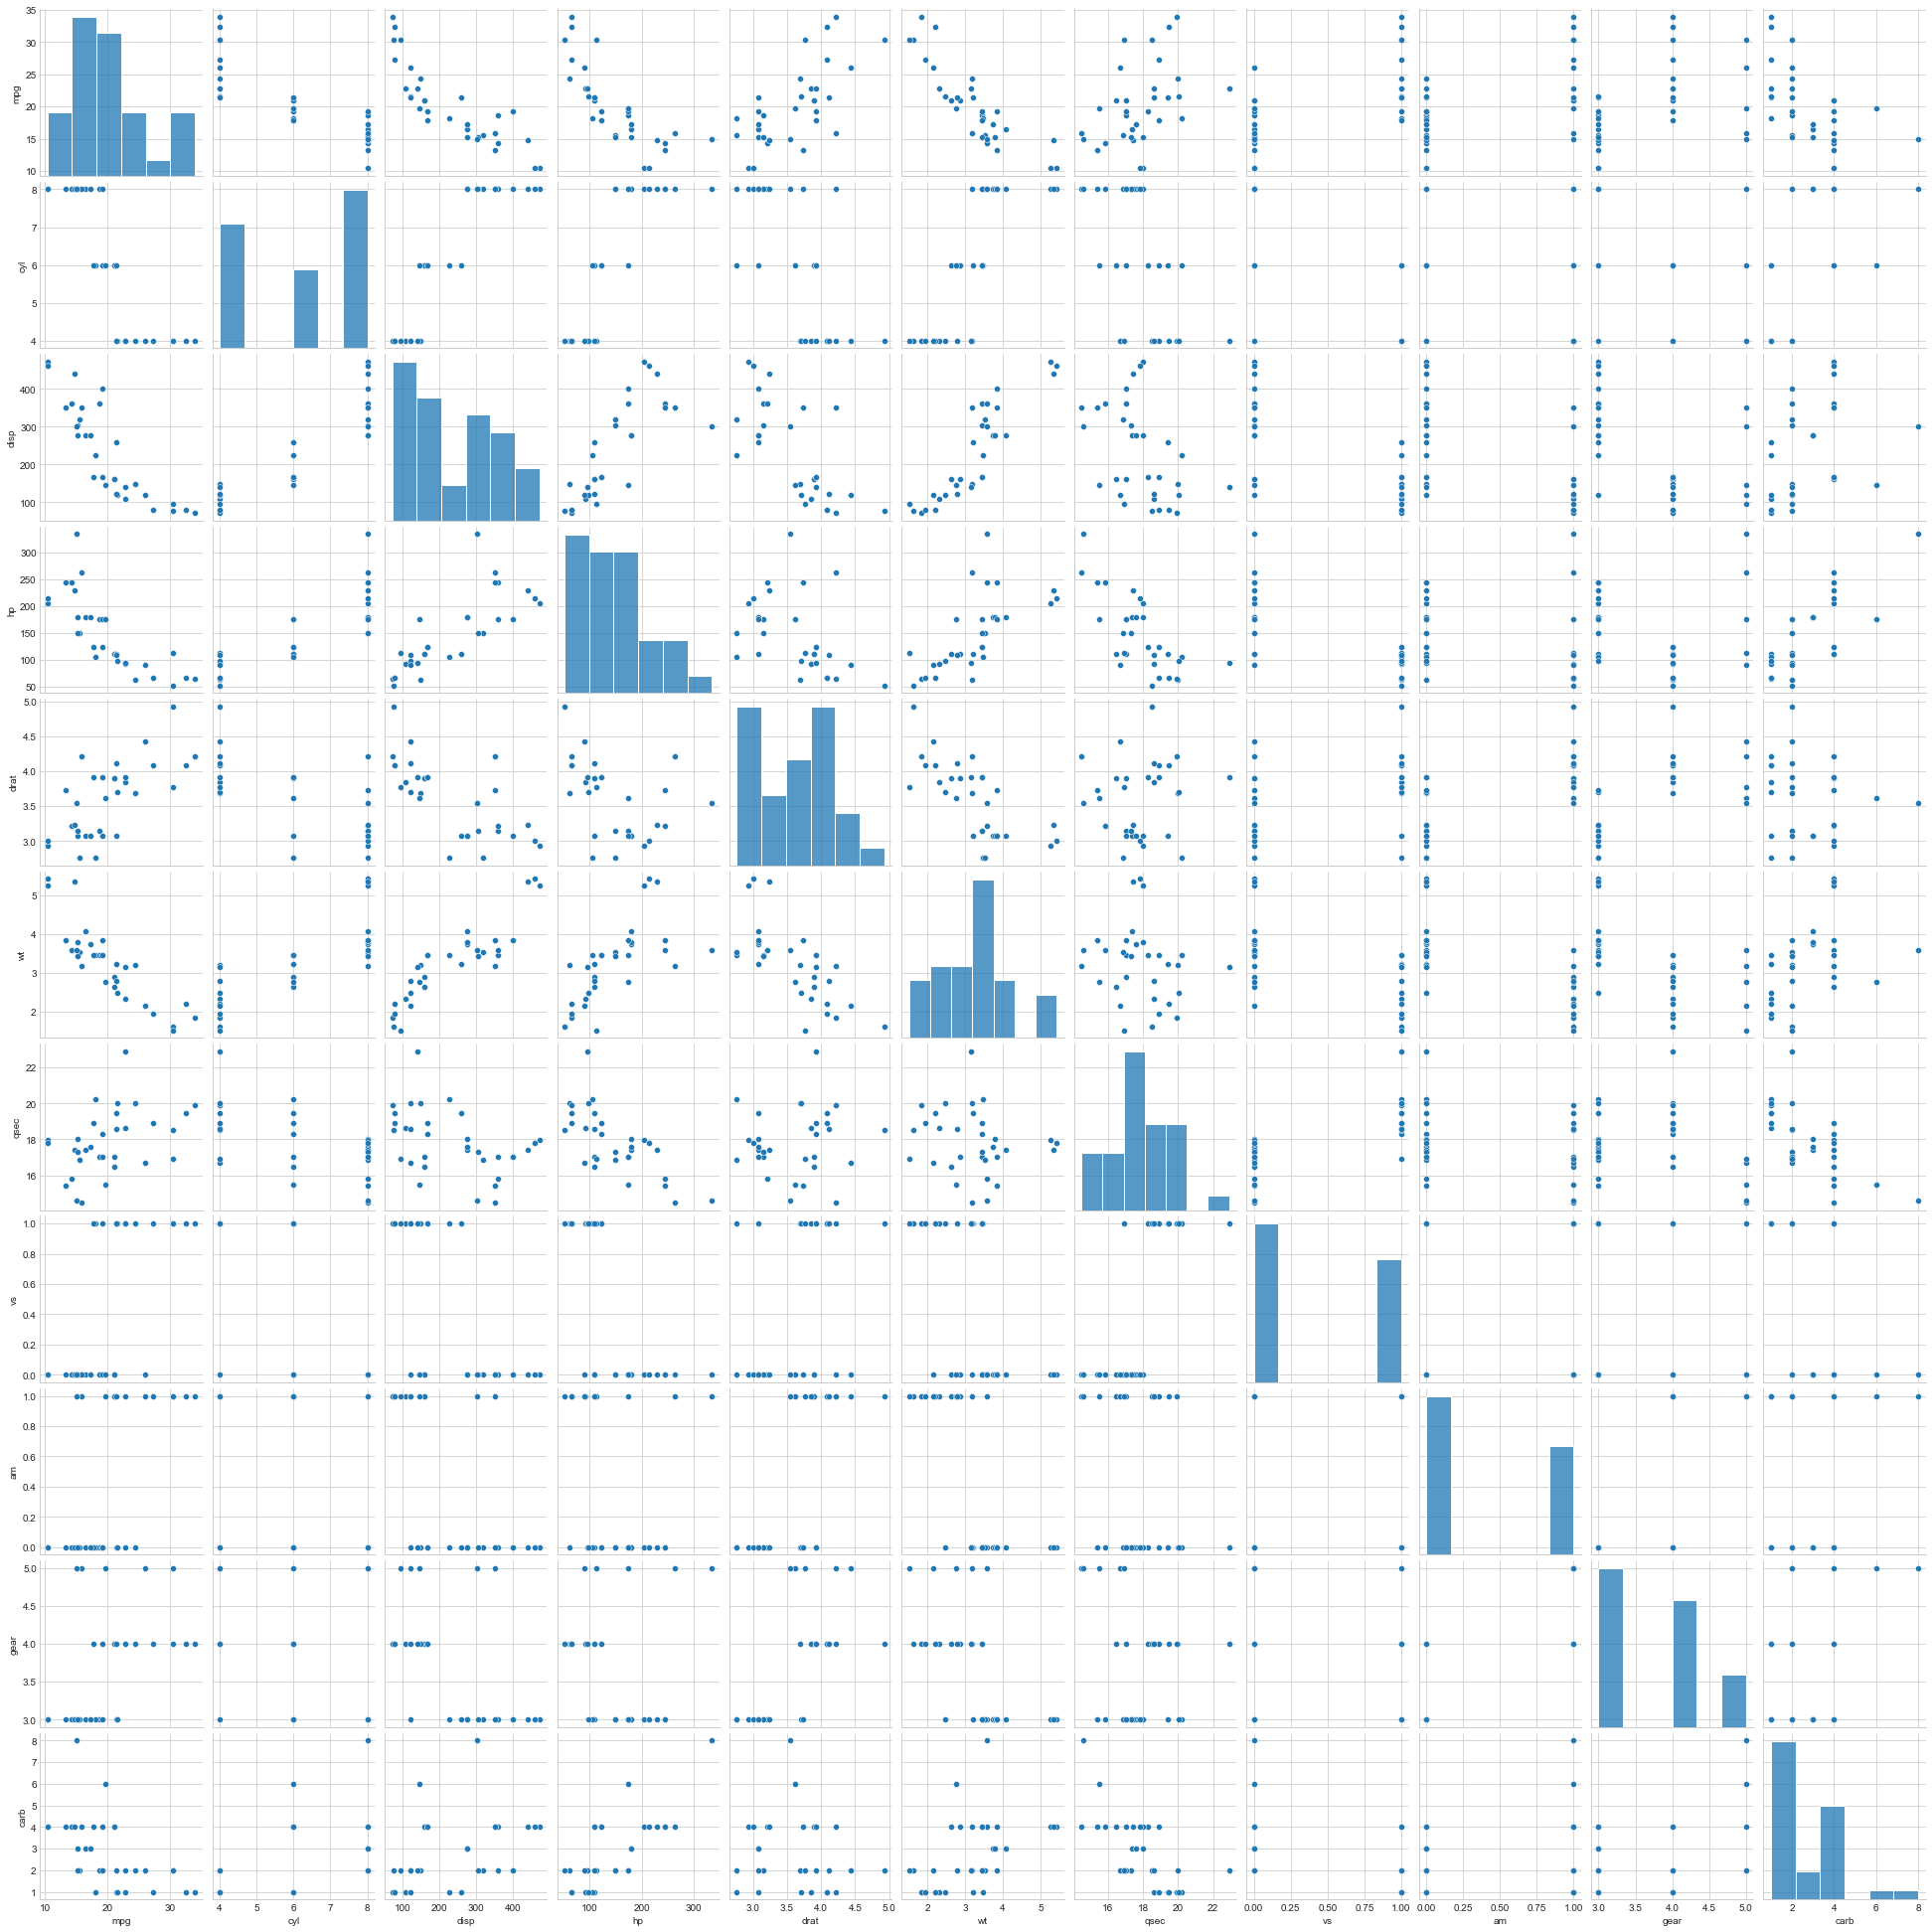

In [114]:
sb.pairplot(cars)

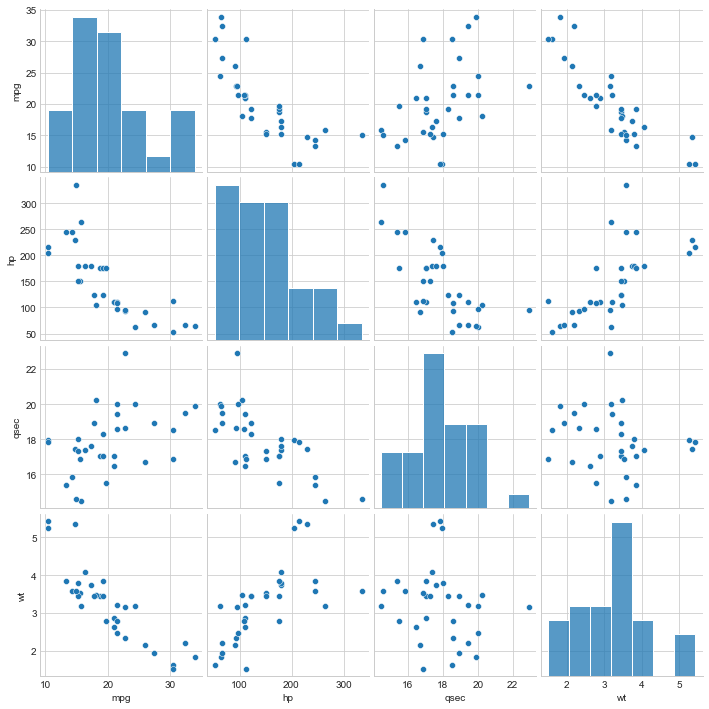

In [115]:
X = cars[['mpg', 'hp', 'qsec', 'wt']]
sb.pairplot(X)

### Using scipy to calculate the Pearson correlation coefficient

In [118]:
mpg = cars['mpg']
hp = cars['hp']
qsec = cars['qsec']
wt = cars['wt']

pearsonr_coefficient, p_value = pearsonr(mpg, hp)
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.776


In [119]:
pearsonr_coefficient, p_value = pearsonr(mpg, qsec)
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient 0.419


In [120]:
pearsonr_coefficient, p_value = pearsonr(mpg, wt)
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

PearsonR Correlation Coefficient -0.868


### Using scipy to calculate the Pearson correlation coefficient

In [121]:
corr = X.corr()
corr

,mpg,hp,qsec,wt
mpg,1.000000,-0.776168,0.418684,-0.867659
hp,-0.776168,1.000000,-0.708223,0.658748
qsec,0.418684,-0.708223,1.000000,-0.174716
wt,-0.867659,0.658748,-0.174716,1.000000


### Using seaborn to visualize the Pearson correlation coefficient

<AxesSubplot:>

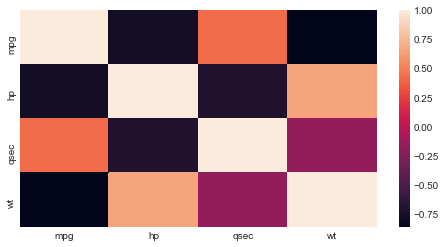

In [122]:
sb.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)

## Segment 6 -Delving into non-parametric methods using pandas and scipy

In [125]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sb
from pylab import rcParams

import scipy
from scipy.stats import spearmanr

In [127]:
%matplotlib inline
rcParams['figure.figsize'] = 14, 7
plt.style.use('seaborn-whitegrid')

# The Spearman Rank Correlation

In [ ]:
"""
ASSUMPTIONS
variables are ordinal; numeric, but abe to be ranked like a categorical variable
variables are relatednonlinearly
data is non-normally dstributed
"""

In [128]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

In [129]:
cars.head()

,car_names,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


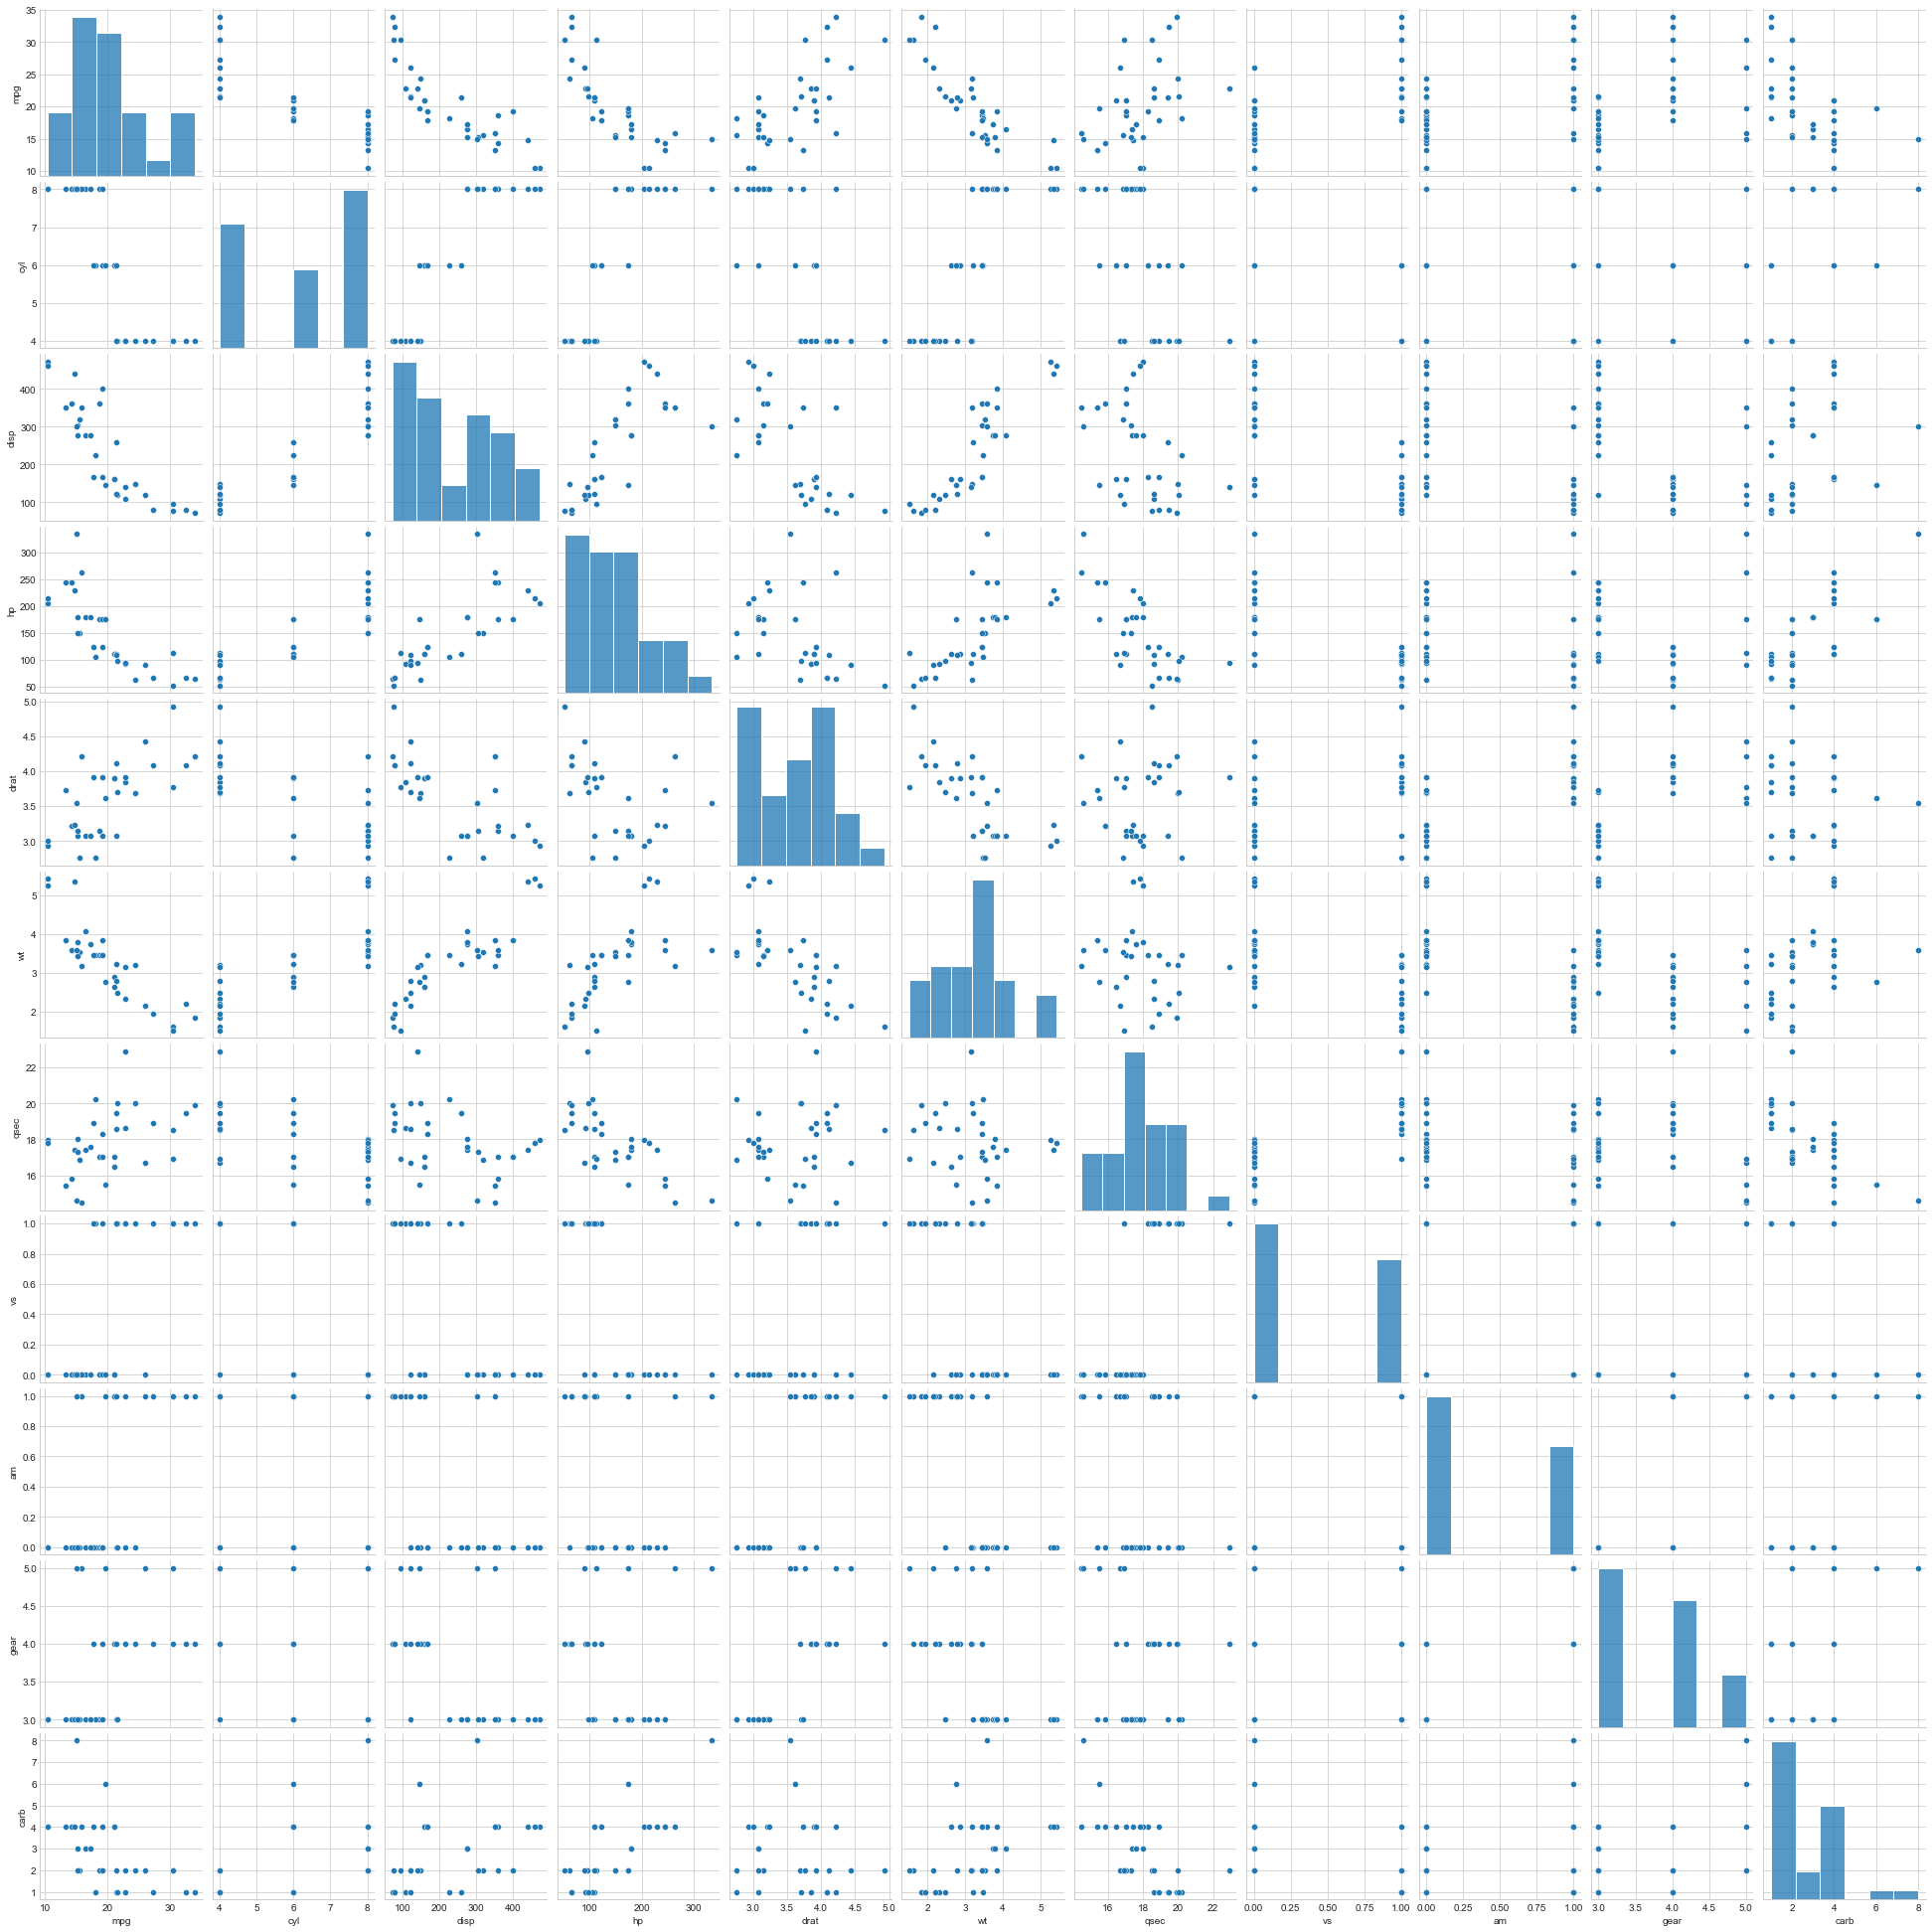

In [130]:
sb.pairplot(cars)

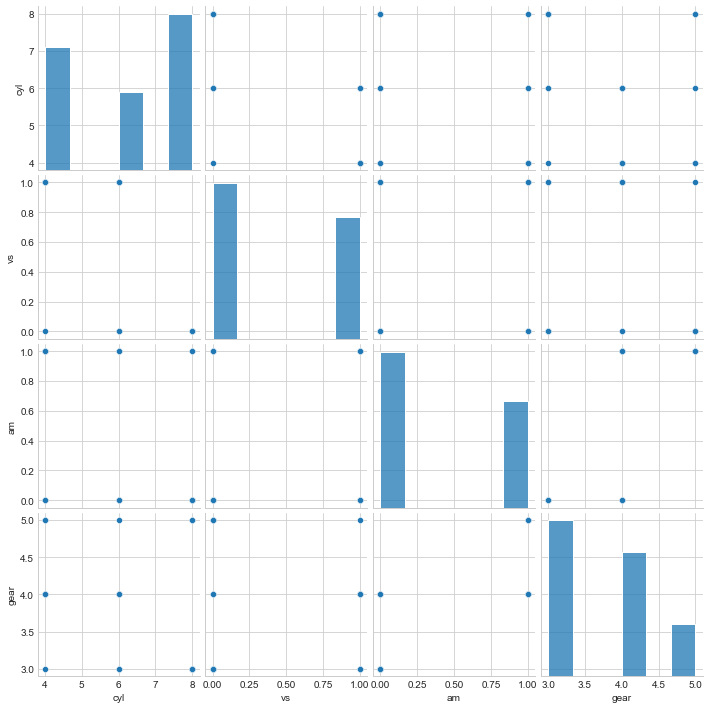

In [131]:
X = cars[['cyl', 'vs', 'am', 'gear']]
sb.pairplot(X)

#ordinal, non-linear, non-normally distributed

In [135]:
cyl = cars['cyl']
vs = cars['vs']
am = cars['am']
gears = cars['gear']

spearmanr_coefficient, p_value = spearmanr(cyl, vs)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.814


In [136]:
spearmanr_coefficient, p_value = spearmanr(cyl, am)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.522


In [137]:
spearmanr_coefficient, p_value = spearmanr(cyl, gears)
print('Spearman Rank Correlation Coefficient %0.3f' % (spearmanr_coefficient))

Spearman Rank Correlation Coefficient -0.564


# Chi-Square Test for Independence

In [ ]:
"""
ASSUMPTIONS
1. P < 0.05 - Reject null hypothesis and conclude that variables are correlated
2. P > 0.05 - Accept null hypothesis and conclude that variables are independent
"""

In [139]:
table = pd.crosstab(cyl, am)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistics 8.741 p_value 0.013


In [140]:
table = pd.crosstab(cyl, vs)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistics 21.340 p_value 0.000


In [141]:
table = pd.crosstab(cyl, gears)

from scipy.stats import chi2_contingency
chi2, p, dof, expected = chi2_contingency(table.values)
print('Chi-square statistics %0.3f p_value %0.3f' % (chi2, p))

Chi-square statistics 18.036 p_value 0.001


## Segment 7 - Transforming dataset distributions

In [2]:
import numpy as np
import pandas as pd
import scipy

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

## Normalizing and transforming features with MinMaxScaler() and fit_transform()

In [4]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

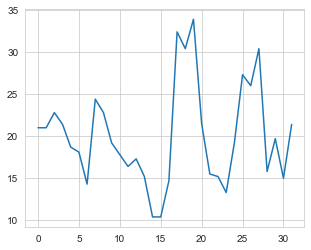

In [5]:
mpg = cars.mpg
plt.plot(mpg)

In [6]:
cars[['mpg']].describe()

,mpg
count,32.000000
mean,20.090625
std,6.026948
min,10.400000
25%,15.425000
50%,19.200000
75%,22.800000
max,33.900000


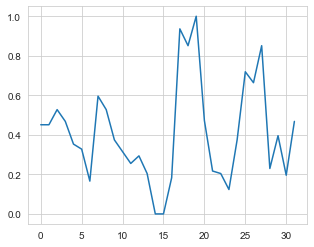

In [9]:
mpg_matrix = mpg.values.reshape(-1, 1)

scaled = preprocessing.MinMaxScaler()

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

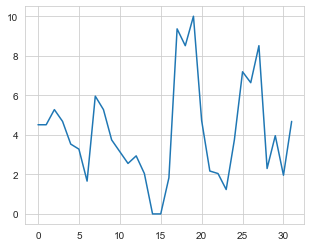

In [11]:
scaled = preprocessing.MinMaxScaler(feature_range=(0,10))

scaled_mpg = scaled.fit_transform(mpg_matrix)
plt.plot(scaled_mpg)

### Using scale() to scale your features

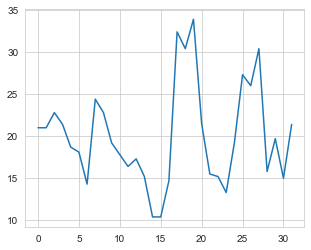

In [12]:
standardized_mpg = scale(mpg, axis=0, with_mean=False, with_std=False)
plt.plot(standardized_mpg)

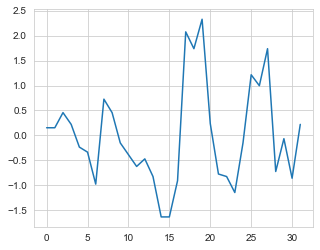

In [13]:
standardized_mpg = scale(mpg)
plt.plot(standardized_mpg)

# Chapter 5 - Outlier Analysis

## Segment 8 - Extreme value analysis using univariate methods

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams

In [3]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4

In [4]:
address = 'C:/Users/User/Exercise Files/Data/iris.data.csv'
df = pd.read_csv(address)

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

In [6]:
X = df.iloc[:, 0:4].values # all rows, but first 4 columns
y = df.iloc[:, 4].values   # all rows, but 4th column
df[:5]    # first 5 records

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
0,4.9,3.0,1.4,0.2,setosa
1,4.7,3.2,1.3,0.2,setosa
2,4.6,3.1,1.5,0.2,setosa
3,5.0,3.6,1.4,0.2,setosa
4,5.4,3.9,1.7,0.4,setosa


### Identifying outliers from Tukey boxplots

[]

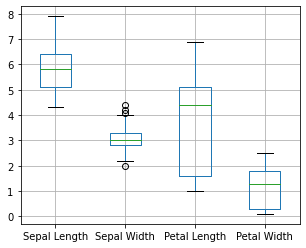

In [7]:
#Lower and upper limits: Q1-IQR and Q3+IQR.

df.boxplot(return_type='dict')
plt.plot()

In [16]:
Sepal_Width = X[:, 1]
iris_outliers = (Sepal_Width > 4)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
14,5.7,4.4,1.5,0.4,setosa
31,5.2,4.1,1.5,0.1,setosa
32,5.5,4.2,1.4,0.2,setosa


In [10]:
Sepal_Width = X[:, 1]
iris_outliers = (Sepal_Width < 2.05)
df[iris_outliers]

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
59,5.0,2.0,3.5,1.0,versicolor


In [14]:
### Applying Tukey outlier labelling
pd.options.display.float_format = '{:.1f}'.format
X_df = pd.DataFrame(X)
X_df.describe()

,0,1,2,3
count,149.0,149.0,149.0,149.0
mean,5.8,3.1,3.8,1.2
std,0.8,0.4,1.8,0.8
min,4.3,2.0,1.0,0.1
25%,5.1,2.8,1.6,0.3
50%,5.8,3.0,4.4,1.3
75%,6.4,3.3,5.1,1.8
max,7.9,4.4,6.9,2.5


## Segment 9 - Multivariate analysis for outlier detection

In [17]:
import pandas as pd

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

In [18]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

### Visually inpspecting boxplots

In [19]:
df = pd.read_csv(filepath_or_buffer='C:/Users/User/Exercise Files/Data/iris.data.csv', header=None, sep=',')

df.columns = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width', 'Species']

<AxesSubplot:xlabel='Species', ylabel='Sepal Length'>

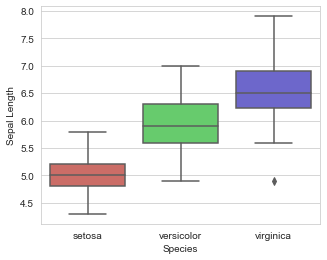

In [20]:
data = df.iloc[:, 0:4].values
target = df.iloc[:, 4].values

df[:5]

sb.boxplot(x='Species', y='Sepal Length', data=df, palette='hls')

### Looking at the scatterplot matrix

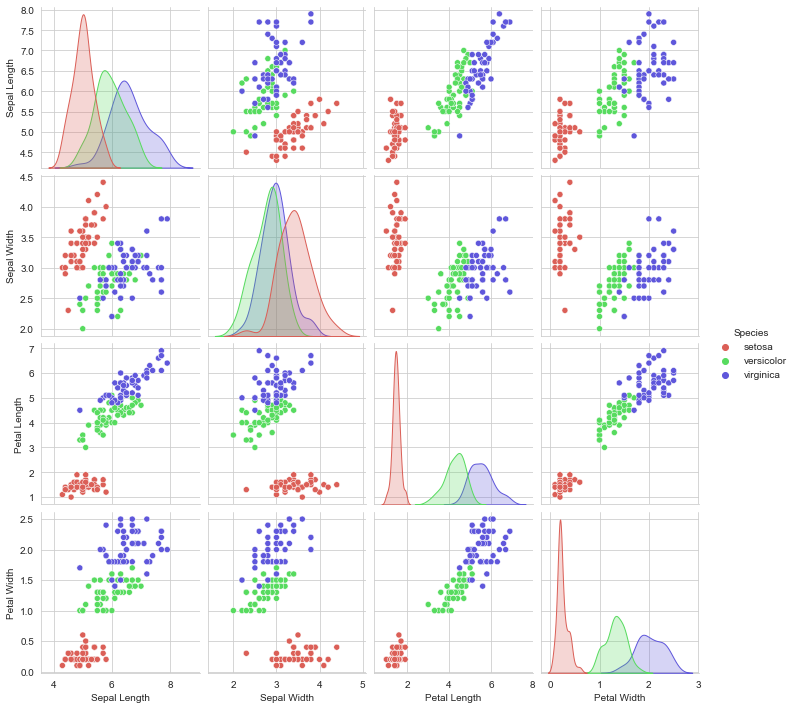

In [21]:
sb.pairplot(df, hue='Species', palette='hls')

## Pearson's correlation for iris.data

In [29]:
pearsonr_coefficient, p_value = pearsonr('Petal Length', 'Petal Width')
print('PearsonR Correlation Coefficient %0.3f'%(pearsonr_coefficient))

NameError: name 'pearsonr' is not defined

# Chapter 6 - Data Sourcing via Web

## Part 1 - Objects in BeautifulSoup

In [10]:
import sys
print(sys.version)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]


In [9]:
pip install bs4

  Using cached bs4-0.0.1.tar.gz (1.1 kB)
  Using cached beautifulsoup4-4.9.3-py3-none-any.whl (115 kB)
  Using cached soupsieve-2.2.1-py3-none-any.whl (33 kB)
Using legacy 'setup.py install' for bs4, since package 'wheel' is not installed.
    Running setup.py install for bs4: started
    Running setup.py install for bs4: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [3]:
from bs4 import BeautifulSoup

## BeautifulSoup Objects

In [15]:
our_html_document = '''\n",
    "<html><head><title>IoT Articles</title></head>\n",
    "<body>\n",
    "<p class='title'><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>\n",
    "\n",
    "<p class='description'>It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...\n",
    "<br>\n",
    "<br>\n",
    "It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.\n",
    "<h1>Looking Back at My Coolest IoT Find in 2017</h1>\n",
    "Before going into detail about best new IoT device ideas, here’s the backstory. <span style=\"text-decoration: underline;\"><strong><a href=\"http://bit.ly/LPlNDJj\">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href=\"http://www.data-mania.com/blog/m2m-vs-iot/\">IoT</a> had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.\n",
    "\n",
    "It wasn’t until I got to the Ericsson Studio that I became extremely impressed by how far IoT has really come. Relying on the promise of the 5g network expansion, IoT-powered smart devices are on the cusp of an explosive growth in adoption. It was Ericsson’s Smart Car that sent me reeling:<a href=\"bit.ly/LPlNDJj\"><img class=\"aligncenter size-full wp-image-3802\" src=\"http://www.data-mania.com/blog/wp-content/uploads/2017/12/new-IoT-device-ideas.jpg\" alt=\"Get your new iot device ideas here\" width=\"1024\" height=\"683\" /></a>\n",
    "\n",
    "This car is connected to Ericsson’s Connected Vehicle Cloud, an IoT platform that manages services for the Smart Cars to which it’s connected. The Volvo pictured above acts as a drop-off location for groceries that have been ordered by its owner.\n",
    "\n",
    "To understand how it works, imagine you’re pulling your normal 9-to-5 and you know you need to grab some groceries on your way home. Well, since you’re smart you’ve used Ericsson IoT platform to connect your car to the local grocery delivery service (<a href=\"http://mat.se/\">Mat.se</a>), so all you need to do is open the Mat.se app and make your usual order. Mat.se automatically handles the payment, grocery selection, delivery, and delivery scheduling. Since your car is IoT-enabled, Mat.se issues its trusted delivery agent a 1-time token to use for opening your car in order to place your groceries in your car for you at 4:40 pm (just before you get off from work).\n",
    "\n",
    "To watch some of the amazing IoT device demos I witnessed at Ericsson Studio, make sure to go <span style=\"text-decoration: underline;\"><strong><a href=\"http://bit.ly/LPlNDJj\">watch the videos on this page</a></strong></span>.\n",
    "<h1>Future Trends for IoT in 2018</h1>\n",
    "New IoT device ideas won’t do you much good unless you at least know the basic technology trends that are set to impact IoT over the next year(s). These include:\n",
    "<ol>\n",
    " \t<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>\n",
    " \t<li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>\n",
    " \t<li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>\n",
    "</ol>\n",
    "<h1>Best New IoT Device Ideas</h1>\n",
    "This listing of new IoT device ideas has been sub-divided according to the main technology upon which the IoT devices are built. Below I’m providing a list of new IoT device ideas, but for detailed instructions on how to build these IoT applications, I recommend the <a href=\"https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&amp;mid=39197&amp;murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated\">IoT courses on Udemy</a> (ß Please note: if you purchase a Udemy course through this link, I may receive a small commission), or courses that are available at <a href=\"http://www.skyfilabs.com/iot-online-courses\">SkyFi</a> and <a href=\"https://www.coursera.org/specializations/iot\">Coursera</a>.\n",
    "<h2>Raspberry Pi IoT Ideas</h2>\n",
    "Using Raspberry Pi as open-source hardware, you can build IoT applications that offer any one of the following benefits:\n",
    "<ol>\n",
    " \t<li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity</li>\n",
    " \t<li>Build a system that detects discrepancies in electrical readings to identify electricity theft</li>\n",
    " \t<li>Use IoT to build a Servo that is controlled by motion detection readings</li>\n",
    " \t<li>Build a smart control switch that operates devices based on external stimuli. Use this for home automation.</li>\n",
    " \t<li>Build a music playing application that enables music for each room in your house</li>\n",
    " \t<li>Implement biometrics on IoT-connected devices</li>\n",
    "</ol>\n",
    "<h2>Arduino IoT Ideas</h2>\n",
    "There are a number of new IoT device ideas that deploy Arduino as a microcontroller. These include:\n",
    "<ol>\n",
    " \t<li>Integrate Arduino with Android to build a remote-control RGB LED device.</li>\n",
    " \t<li>Connect PIR sensors across the IoT to implement a smart building.</li>\n",
    " \t<li>Build a temperature and sunlight sensor system to remotely monitor and control the conditions of your garden.</li>\n",
    " \t<li>Deploy Arduino and IoT to automate your neighborhood streetlights.</li>\n",
    " \t<li>Build a smart irrigation system based on IoT-connected temperature and moisture sensors built-in to your agricultural plants.</li>\n",
    "</ol>\n",
    "[caption id=\"attachment_3807\" align=\"aligncenter\" width=\"300\"]<a href=\"bit.ly/LPlNDJj\"><img class=\"wp-image-3807 size-medium\" src=\"http://www.data-mania.com/blog/wp-content/uploads/2017/12/IMG_3058-300x295.jpg\" alt=\"\" width=\"300\" height=\"295\" /></a> An IoT Chatbot Tree at the Ericsson Studio[/caption]\n",
    "<h2>Wireless (GSM) IoT Ideas</h2>\n",
    "Several new IoT device ideas are developed around the GSM wireless network. Those are:\n",
    "<ol>\n",
    " \t<li>Monitor soil moisture to automate agricultural irrigation cycles.</li>\n",
    " \t<li>Automate and control the conditions of a greenhouse.</li>\n",
    " \t<li>Enable bio-metrics to build a smart security system for your home or office building</li>\n",
    " \t<li>Build an autonomously operating fitness application that automatically makes recommendations based on motion detection and heart rate sensors that are embedded on wearable fitness trackers.</li>\n",
    " \t<li>Build a healthcare monitoring system that tracks, informs, and automatically alerts healthcare providers based on sensor readings that describe a patients vital statistics (like temperature, pulse, blood pressure, etc).</li>\n",
    "</ol>\n",
    "<h2>IoT Automation Ideas</h2>\n",
    "Almost all new IoT device ideas offer automation benefits, but to outline a few more ideas:\n",
    "<ol>\n",
    " \t<li>Build an IoT device that automatically locates and reports the closest nearby parking spot.</li>\n",
    " \t<li>Build a motion detection system that automatically issues emails or sms messages to alert home owners of a likely home invasion.</li>\n",
    " \t<li>Use temperature sensors connected across the IoT to automatically alert you if your home windows or doors have been left open.</li>\n",
    " \t<li>Use bio-metric sensors to build a smart system that automate security for your home or office building</li>\n",
    "</ol>\n",
    "To learn more about IoT and what’s happening on the leading edge, be sure to pop over to Ericsson’s Studio Tour recap and <span style=\"text-decoration: underline;\"><strong><a href=\"http://bit.ly/LPlNDJj\">watch these videos</a></strong></span>.\n",
    "\n",
    "<em>(I captured some of this content on behalf of DevMode Strategies during an invite-only tour of the Ericsson Studio in Kista. Rest assure, the text and opinions are my own</em>)\n",
    "<p class='description'>...</p>\n",
    '''

In [16]:
our_soup_object = BeautifulSoup(our_html_document, 'html.parser')
print(our_soup_object)


",
    "<html><head><title>IoT Articles</title></head>
",
    "<body>
",
    "<p class="title"><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>
",
    "
",
    "<p class="description">It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
",
    "<br/>
",
    "<br/>
",
    "It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
",
    "<h1>Looking Back at My Coolest IoT Find in 2017</h1>
",
    "Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.c

In [17]:
print(our_soup_object.prettify()[0:300])

",
    "
<html>
 <head>
  <title>
   IoT Articles
  </title>
 </head>
 ",
    "
 <body>
  ",
    "
  <p class="title">
   <b>
    2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
   </b>
  </p>
  ",
    "
",
    "
  <p class="description">
   It’s almost 2018 and IoT is on th


## Tag Object

### Tag names

In [24]:
pip install lxml

Note: you may need to restart the kernel to use updated packages.


In [63]:
soup_object = BeautifulSoup('<h1 attribute_1 = "Heading Level 1""Future Trends for IoT in 2018</h1>', "lxml")

tag = soup_object.h1
type(tag)

bs4.element.Tag

In [64]:
print(tag)

<h1 attribute_1="Heading Level 1" for="" in="" iot="" trends=""></h1>


In [65]:
tag.name

'h1'

In [66]:
tag.name = 'heading 1'
tag

<heading 1 attribute_1="Heading Level 1" for="" in="" iot="" trends=""></heading 1>

In [67]:
tag.name

'heading 1'

### Tag attributes

In [68]:
soup_object = BeautifulSoup('<h1 attribute_1 = "Heading Level 1"">Future Treds for IoT in 2018</h1>', "lxml")
tag = soup_object.h1
tag

<h1 attribute_1="Heading Level 1">Future Treds for IoT in 2018</h1>

In [69]:
tag['attribute_1']

'Heading Level 1'

In [70]:
tag.attrs

{'attribute_1': 'Heading Level 1'}

In [71]:
tag['attribute_2'] = 'Heading Level 1'
tag.attrs

{'attribute_1': 'Heading Level 1', 'attribute_2': 'Heading Level 1'}

In [75]:
tag

<h1 attribute_1="Heading Level 1">Future Treds for IoT in 2018</h1>

In [83]:
del tag['attribute_2']
tag.attrs

{'attribute_1': 'Heading Level 1'}

### Navigating a parse tree using tags

In [36]:
#First we will recreate our parse tree
our_html_document = '''\n",
    "<html><head><title>IoT Articles</title></head>\n",
    "<body>\n",
    "<p class='title'><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>\n",
    "\n",
    "<p class='description'>It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...\n",
    "<br>\n",
    "<br>\n",
    "It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.\n",
    "<h1>Looking Back at My Coolest IoT Find in 2017</h1>\n",
    "Before going into detail about best new IoT device ideas, here’s the backstory. <span style=\"text-decoration: underline;\"><strong><a href=\"http://bit.ly/LPlNDJj\">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href=\"http://www.data-mania.com/blog/m2m-vs-iot/\">IoT</a> had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.\n",
    "\n",
    "It wasn’t until I got to the Ericsson Studio that I became extremely impressed by how far IoT has really come. Relying on the promise of the 5g network expansion, IoT-powered smart devices are on the cusp of an explosive growth in adoption. It was Ericsson’s Smart Car that sent me reeling:<a href=\"bit.ly/LPlNDJj\"><img class=\"aligncenter size-full wp-image-3802\" src=\"http://www.data-mania.com/blog/wp-content/uploads/2017/12/new-IoT-device-ideas.jpg\" alt=\"Get your new iot device ideas here\" width=\"1024\" height=\"683\" /></a>\n",
    "\n",
    "This car is connected to Ericsson’s Connected Vehicle Cloud, an IoT platform that manages services for the Smart Cars to which it’s connected. The Volvo pictured above acts as a drop-off location for groceries that have been ordered by its owner.\n",
    "\n",
    "To understand how it works, imagine you’re pulling your normal 9-to-5 and you know you need to grab some groceries on your way home. Well, since you’re smart you’ve used Ericsson IoT platform to connect your car to the local grocery delivery service (<a href=\"http://mat.se/\">Mat.se</a>), so all you need to do is open the Mat.se app and make your usual order. Mat.se automatically handles the payment, grocery selection, delivery, and delivery scheduling. Since your car is IoT-enabled, Mat.se issues its trusted delivery agent a 1-time token to use for opening your car in order to place your groceries in your car for you at 4:40 pm (just before you get off from work).\n",
    "\n",
    "To watch some of the amazing IoT device demos I witnessed at Ericsson Studio, make sure to go <span style=\"text-decoration: underline;\"><strong><a href=\"http://bit.ly/LPlNDJj\">watch the videos on this page</a></strong></span>.\n",
    "<h1>Future Trends for IoT in 2018</h1>\n",
    "New IoT device ideas won’t do you much good unless you at least know the basic technology trends that are set to impact IoT over the next year(s). These include:\n",
    "<ol>\n",
    " \t<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>\n",
    " \t<li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>\n",
    " \t<li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>\n",
    "</ol>\n",
    "<h1>Best New IoT Device Ideas</h1>\n",
    "This listing of new IoT device ideas has been sub-divided according to the main technology upon which the IoT devices are built. Below I’m providing a list of new IoT device ideas, but for detailed instructions on how to build these IoT applications, I recommend the <a href=\"https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&amp;mid=39197&amp;murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated\">IoT courses on Udemy</a> (ß Please note: if you purchase a Udemy course through this link, I may receive a small commission), or courses that are available at <a href=\"http://www.skyfilabs.com/iot-online-courses\">SkyFi</a> and <a href=\"https://www.coursera.org/specializations/iot\">Coursera</a>.\n",
    "<h2>Raspberry Pi IoT Ideas</h2>\n",
    "Using Raspberry Pi as open-source hardware, you can build IoT applications that offer any one of the following benefits:\n",
    "<ol>\n",
    " \t<li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity</li>\n",
    " \t<li>Build a system that detects discrepancies in electrical readings to identify electricity theft</li>\n",
    " \t<li>Use IoT to build a Servo that is controlled by motion detection readings</li>\n",
    " \t<li>Build a smart control switch that operates devices based on external stimuli. Use this for home automation.</li>\n",
    " \t<li>Build a music playing application that enables music for each room in your house</li>\n",
    " \t<li>Implement biometrics on IoT-connected devices</li>\n",
    "</ol>\n",
    "<h2>Arduino IoT Ideas</h2>\n",
    "There are a number of new IoT device ideas that deploy Arduino as a microcontroller. These include:\n",
    "<ol>\n",
    " \t<li>Integrate Arduino with Android to build a remote-control RGB LED device.</li>\n",
    " \t<li>Connect PIR sensors across the IoT to implement a smart building.</li>\n",
    " \t<li>Build a temperature and sunlight sensor system to remotely monitor and control the conditions of your garden.</li>\n",
    " \t<li>Deploy Arduino and IoT to automate your neighborhood streetlights.</li>\n",
    " \t<li>Build a smart irrigation system based on IoT-connected temperature and moisture sensors built-in to your agricultural plants.</li>\n",
    "</ol>\n",
    "[caption id=\"attachment_3807\" align=\"aligncenter\" width=\"300\"]<a href=\"bit.ly/LPlNDJj\"><img class=\"wp-image-3807 size-medium\" src=\"http://www.data-mania.com/blog/wp-content/uploads/2017/12/IMG_3058-300x295.jpg\" alt=\"\" width=\"300\" height=\"295\" /></a> An IoT Chatbot Tree at the Ericsson Studio[/caption]\n",
    "<h2>Wireless (GSM) IoT Ideas</h2>\n",
    "Several new IoT device ideas are developed around the GSM wireless network. Those are:\n",
    "<ol>\n",
    " \t<li>Monitor soil moisture to automate agricultural irrigation cycles.</li>\n",
    " \t<li>Automate and control the conditions of a greenhouse.</li>\n",
    " \t<li>Enable bio-metrics to build a smart security system for your home or office building</li>\n",
    " \t<li>Build an autonomously operating fitness application that automatically makes recommendations based on motion detection and heart rate sensors that are embedded on wearable fitness trackers.</li>\n",
    " \t<li>Build a healthcare monitoring system that tracks, informs, and automatically alerts healthcare providers based on sensor readings that describe a patients vital statistics (like temperature, pulse, blood pressure, etc).</li>\n",
    "</ol>\n",
    "<h2>IoT Automation Ideas</h2>\n",
    "Almost all new IoT device ideas offer automation benefits, but to outline a few more ideas:\n",
    "<ol>\n",
    " \t<li>Build an IoT device that automatically locates and reports the closest nearby parking spot.</li>\n",
    " \t<li>Build a motion detection system that automatically issues emails or sms messages to alert home owners of a likely home invasion.</li>\n",
    " \t<li>Use temperature sensors connected across the IoT to automatically alert you if your home windows or doors have been left open.</li>\n",
    " \t<li>Use bio-metric sensors to build a smart system that automate security for your home or office building</li>\n",
    "</ol>\n",
    "To learn more about IoT and what’s happening on the leading edge, be sure to pop over to Ericsson’s Studio Tour recap and <span style=\"text-decoration: underline;\"><strong><a href=\"http://bit.ly/LPlNDJj\">watch these videos</a></strong></span>.\n",
    "\n",
    "<em>(I captured some of this content on behalf of DevMode Strategies during an invite-only tour of the Ericsson Studio in Kista. Rest assure, the text and opinions are my own</em>)\n",
    "<p class='description'>...</p>\n",
    '''

our_soup_object = BeautifulSoup(our_html_document, 'html.parser')


In [38]:
our_soup_object.head

<head><title>IoT Articles</title></head>

In [39]:
our_soup_object.title

<title>IoT Articles</title>

In [40]:
our_soup_object.body.b

<b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b>

In [41]:
our_soup_object.body

<body>
",
    "<p class="title"><b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b></p>
",
    "
",
    "<p class="description">It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...
",
    "<br/>
",
    "<br/>
",
    "It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
",
    "<h1>Looking Back at My Coolest IoT Find in 2017</h1>
",
    "Before going into detail about best new IoT device ideas, here’s the backstory. <span style="text-decoration: underline;"><strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong></span> to tour the Ericsson Studio in Kista, Sweden. Up until that visit, <a href="http://www.data-mania.com/blog/m2m-vs-iot/">IoT</a> had been largely theoretical to me.

In [42]:
our_soup_object.li

<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>

In [43]:
our_soup_object.a

<a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a>

## Part 2 - NavigableString Objects

In [45]:
import sys
print(sys.version)

3.7.4 (tags/v3.7.4:e09359112e, Jul  8 2019, 20:34:20) [MSC v.1916 64 bit (AMD64)]


In [47]:
from bs4 import BeautifulSoup

## NavigableString Objects

In [77]:
soub_object = BeautifulSoup('<h1 attribute_1 = "Heading Level 1"">Future Trends for IoT in 2018</h1>', "lxml")

tag = soup_object.h1

type(tag)

bs4.element.Tag

In [78]:
tag.name


'h1'

In [79]:
tag.string

'Future Treds for IoT in 2018'

In [80]:
type(tag.string)

bs4.element.NavigableString

In [81]:
our_navigatable_string = tag.string
our_navigatable_string

'Future Treds for IoT in 2018'

In [82]:
our_navigatable_string.replace_with('NaN')

'Future Treds for IoT in 2018'

In [84]:
for string in our_soup_object.stripped_strings:
    print(repr(string))

'",\n    "'
'IoT Articles'
'",\n    "'
'",\n    "'
'2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers'
'",\n    "\n",\n    "'
'It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...\n",\n    "'
'",\n    "'
'",\n    "It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.\n",\n    "'
'Looking Back at My Coolest IoT Find in 2017'
'",\n    "Before going into detail about best new IoT device ideas, here’s the backstory.'
'Last month Ericsson Digital invited me'
'to tour the Ericsson Studio in Kista, Sweden. Up until that visit,'
'IoT'
'had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I

In [85]:
first_link = our_soup_object.a
print(first_link)

<a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a>


In [86]:
first_link.parent

<strong><a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a></strong>

In [87]:
first_link.string

'Last month Ericsson Digital invited me'

In [88]:
first_link.string.parent

<a href="http://bit.ly/LPlNDJj">Last month Ericsson Digital invited me</a>

## Segment 3 - Data Parsing

In [91]:
from bs4 import BeautifulSoup

import urllib
import urllib.request
import re

In [94]:
with urllib.request.urlopen('https://raw.githubusercontent.com/BigDataGal/Data-Mania-Demos/master/IoT-2018.html') as response:
    html = response.read()

In [96]:
soup = BeautifulSoup(html, "lxml")
type(soup)

bs4.BeautifulSoup

## Parsing your data

In [97]:
print(soup.prettify()[0:100])

<html>
 <head>
  <title>
   IoT Articles
  </title>
 </head>
 <body>
  <p class="title">
   <b>
    


## Getting data from a parsee tree

In [98]:
text_only = soup.get_text()
print(text_only)

IoT Articles

2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers
It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use...


It’s almost 2018 and IoT is on the cusp of an explosive expansion. In this article, I offer you a listing of new IoT device ideas that you can use to get practice in designing your first IoT applications.
Looking Back at My Coolest IoT Find in 2017
Before going into detail about best new IoT device ideas, here’s the backstory. Last month Ericsson Digital invited me to tour the Ericsson Studio in Kista, Sweden. Up until that visit, IoT had been largely theoretical to me. Of course, I know the usual mumbo-jumbo about wearables and IoT-connected fitness trackers. That stuff is all well and good, but it’s somewhat old hat – plus I am not sure we are really benefiting so much from those, so I’m not that impressed.

It wasn’t until I got to the Ericsson Stu

## Searching and retrieving data from a parse tree

### Retrieving tags by filtering with name arguments

In [101]:
soup.find_all("li")

[<li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>,
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>,
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>,
 <li>Enable built-in sensing to build a weather station that measures ambient temperature and humidity<

### Retrieving tags by filtering with keyword arguments

In [102]:
soup.find_all(id="link 7")

[<a class="preview" href="http://www.skyfilabs.com/iot-online-courses" id="link 7">SkyFi</a>]

### Retrieving tags by filtering with string arguments

In [103]:
soup.find_all('ol')

[<ol>
 <li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
 </ol>,
 <ol>
 <li>Enable built-in sensing to build a weather station that measures ambient temperat

### Retrieving tags by filtering with list objects

In [104]:
soup.find_all(['ol', 'b'])

[<b>2018 Trends: Best New IoT Device Ideas for Data Scientists and Engineers</b>,
 <ol>
 <li><strong>Big Data</strong> &amp; Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.</li>
 <li><strong>Machine Learning</strong> Data Science: While a lot of IoT devices are still operated according to rules-based decision criteria, the age of artificial intelligence is upon us. IoT will increasingly depend on machine learning algorithms to control device operations so that devices are able to autonomously respond to a complex set of overlapping stimuli.</li>
 <li><strong>Blockchain</strong>-Enabled Security: Above all else, IoT networks must be secure. Blockchain technology is primed to meet the security demands that come along with building and expanding the IoT.</li>
 </ol>,
 <ol>
 <li

### Retrieving tags by filtering with regular expressions

In [105]:
t = re.compile("t")
for tag in soup.find_all(t):
    print(tag.name)

html
title
strong
strong
strong
strong
strong
strong


### Retrieving tags by filtering with a Boolean value

In [107]:
for tag in soup.find_all(True):
    print(tag.name)

html
head
title
body
p
b
p
br
br
h1
span
strong
a
a
a
img
a
span
strong
a
h1
ol
li
strong
li
strong
li
strong
h1
a
a
a
h2
ol
li
li
li
li
li
li
h2
ol
li
li
li
li
li
a
img
h2
ol
li
li
li
li
li
h2
ol
li
li
li
li
span
strong
a
em
p


### Retrieving tags by filtering with string objects

In [108]:
for link in soup.find_all('a'):
    print(link.get('href'))

http://bit.ly/LPlNDJj
http://www.data-mania.com/blog/m2m-vs-iot/
bit.ly/LPlNDJj
http://mat.se/
http://bit.ly/LPlNDJj
https://click.linksynergy.com/deeplink?id=*JDLXjeE*wk&mid=39197&murl=https%3A%2F%2Fwww.udemy.com%2Ftopic%2Finternet-of-things%2F%3Fsort%3Dhighest-rated
http://www.skyfilabs.com/iot-online-courses
https://www.coursera.org/specializations/iot
bit.ly/LPlNDJj
http://bit.ly/LPlNDJj


### Retrieving string by filtering with regular expressions

In [109]:
soup.find_all(string = re.compile("data"))

[' & Data Engineering: Sensors that are embedded within IoT devices spin off machine-generated data like it’s going out of style. For IoT to function, the platform must be solidly engineered to handle big data. Be assured, that requires some serious data engineering.']

## Segment 4 - Web Scraping 

In [111]:
from bs4 import BeautifulSoup
import urllib.request
from IPython.display import HTML
import re

In [112]:
r = urllib.request.urlopen('https://analytics.usa.gov/').read()
soup = BeautifulSoup(r, "lxml")
type(soup)

bs4.BeautifulSoup

In [113]:
print(soup.prettify()[:100])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--



In [114]:
for link in soup.find_all('a'):
    print(link.get('href'))

/
#explanation
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
data/
#top-pages-realtime
#top-pages-7-days
#top-pages-30-days
https://analytics.usa.gov/data/live/all-pages-realtime.csv
https://analytics.usa.gov/data/live/all-domains-30-days.csv
https://www.digitalgov.gov/services/dap/
https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4
https://support.google.com/analytics/answer/2763052?hl=en
https://analytics.usa.gov/data/live/second-level-domains.csv
https://analytics.usa.gov/data/live/sites.csv
mailto:DAP@support.digitalgov.gov
https://analytics.usa.gov/data/
https://open.gsa.gov/api/dap/
mailto:DAP@support.digitalgov.gov
https://github.com/GSA/analytics.usa.gov/issues
https://github.com/GSA/analytics.usa.gov
https://github.com/18F/analytics-reporter
http://www.gsa.gov/
https://www.digitalgov.gov/services/dap/
https://cloud.gov/


In [115]:
print(soup.get_text())
















analytics.usa.gov | The US government's web traffic.






















analytics.usa.gov
              


About this site
Data | API



Select an agency

All Participating Websites
Agency for International Development
Department of Agriculture
Department of Commerce
Department of Defense
Department of Education
Department of Energy
Department of Health and Human Services
Department of Homeland Security
Department of Housing and Urban Development
Department of Justice
Department of Labor
Department of State
Department of Transportation
Department of Veterans Affairs
Department of the Interior
Department of the Treasury
Environmental Protection Agency
Executive Office of the President
General Services Administration
National Aeronautics and Space Administration
National Archives and Records Administration
National Science Foundation
Nuclear Regulatory Commission
Office of Personnel Management
Postal Service
Small Business Administration
Social Security Administration



In [116]:
print(soup.prettify()[0:1000])

<!DOCTYPE html>
<html lang="en">
 <!-- Initalize title and data source variables -->
 <head>
  <!--

    Hi! Welcome to our source code.

    This dashboard uses data from the Digital Analytics Program, a US
    government team inside the General Services Administration.


    For a detailed tech breakdown of how 18F and friends built this site:

    https://18f.gsa.gov/2015/03/19/how-we-built-analytics-usa-gov/


    This is a fully open source project, and your contributions are welcome.

    Frontend static site: https://github.com/18F/analytics.usa.gov
    Backend data reporting: https://github.com/18F/analytics-reporter

    -->
  <meta charset="utf-8"/>
  <meta content="IE=Edge" http-equiv="X-UA-Compatible"/>
  <meta content="NjbZn6hQe7OwV-nTsa6nLmtrOUcSGPRyFjxm5zkmCcg" name="google-site-verification"/>
  <link href="/css/vendor/css/uswds.v0.9.6.css" rel="stylesheet"/>
  <link href="/css/public_analytics.css" rel="stylesheet"/>
  <link href="/images/analytics-favicon.ico" rel="ic

In [121]:
for link in soup.findAll('a', attrs={'href': re.compile("^http")}):
    print(link)
type(link)

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" rel="noopener" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the d

bs4.element.Tag

In [123]:
file = open("parsed_data.txt", "w")
for link in soup.findAll('a', attrs={'href': re.compile("^http")}):
    soup_link = str(link)
    print(soup_link)
    file.write(soup_link)
file.flush()```````````````
file.close()

<a href="https://analytics.usa.gov/data/">Data</a>
<a href="https://open.gsa.gov/api/dap/" rel="noopener" target="_blank">API</a>
<a href="https://analytics.usa.gov/data/live/all-pages-realtime.csv">Download the full dataset.</a>
<a href="https://analytics.usa.gov/data/live/all-domains-30-days.csv">Download the full dataset.</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/">Digital Analytics Program</a>
<a class="external-link" href="https://www.digitalgov.gov/services/dap/common-questions-about-dap-faq/#part-4">does not track individuals</a>
<a class="external-link" href="https://support.google.com/analytics/answer/2763052?hl=en">anonymizes the IP addresses</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/second-level-domains.csv">400 executive branch government domains</a>
<a class="external-link" href="https://analytics.usa.gov/data/live/sites.csv">about 5,700 total websites</a>
<a href="https://analytics.usa.gov/data/">download the d

In [124]:
%pwd

'C:\\Users\\User'

## Segment 5 - Introduction to NLP

In [127]:
pip install nltk

In [6]:
import nltk

In [7]:
text = "On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks. The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share."

In [8]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Sentence Tokenizer

In [15]:
from nltk.tokenize import sent_tokenize
sent_tk = sent_tokenize(text)
print("Sentence tokenizing the text: \n")
print(sent_tk)

Sentence tokenizing the text: 

['On Wednesday, the Association for Computing Machinery, the world’s largest society of computing professionals, announced that Hinton, LeCun and Bengio had won this year’s Turing Award for their work on neural networks.', 'The Turing Award, which was introduced in 1966, is often called the Nobel Prize of computing, and it includes a $1 million prize, which the three scientists will share.']


### Word Tokenizer

In [9]:
from nltk.tokenize import word_tokenize
word_tk = word_tokenize(text)
print("Word tokenizing the text: \n")
print(word_tk)

Word tokenizing the text: 

['On', 'Wednesday', ',', 'the', 'Association', 'for', 'Computing', 'Machinery', ',', 'the', 'world', '’', 's', 'largest', 'society', 'of', 'computing', 'professionals', ',', 'announced', 'that', 'Hinton', ',', 'LeCun', 'and', 'Bengio', 'had', 'won', 'this', 'year', '’', 's', 'Turing', 'Award', 'for', 'their', 'work', 'on', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'which', 'was', 'introduced', 'in', '1966', ',', 'is', 'often', 'called', 'the', 'Nobel', 'Prize', 'of', 'computing', ',', 'and', 'it', 'includes', 'a', '$', '1', 'million', 'prize', ',', 'which', 'the', 'three', 'scientists', 'will', 'share', '.']


In [36]:
from nltk.tokenize import word_tokenize
txt = "NLP is a branch of artificial intelligence that helps computers understand, interpret and manipulate human language."
words_tk = word_tokenize(txt)
print("Word tokenizing the text: \n")
print(words_tk)

Word tokenizing the text: 

['NLP', 'is', 'a', 'branch', 'of', 'artificial', 'intelligence', 'that', 'helps', 'computers', 'understand', ',', 'interpret', 'and', 'manipulate', 'human', 'language', '.']


### Removing stop words

In [17]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
from nltk.corpus import stopwords
sw = set(stopwords.words("english"))
print("Stop words n English Language are: \n")
print(sw)

Stop words n English Language are: 

{'against', 'will', 'here', 'what', "shan't", "hadn't", 'our', 'ma', 'once', 'hers', 'he', 'themselves', 'up', 'it', 'her', 'above', "weren't", 'shan', 'does', 'there', 'those', 'did', 'am', 'at', 'this', 'they', 'why', 'all', 'again', 'into', 'so', 'him', "needn't", "it's", 'aren', 'or', 'through', 'than', 'was', 'you', "aren't", 'theirs', 'were', "mustn't", 'has', 'won', "that'll", "won't", 'how', 'had', 'can', "hasn't", 'are', "you'll", 'who', 'o', 'as', 'under', 'should', 'of', 'during', 'wasn', 'being', 'yourself', 'some', 'to', "wouldn't", 'having', "should've", "she's", 'been', 'and', 'too', 'mightn', 'only', 'until', 'mustn', 'each', 'on', 'few', "didn't", 'for', 'other', 'weren', 'doesn', 'no', 'over', 'be', 'yourselves', 'both', 'them', 'wouldn', 'where', 't', 'but', 'a', 'off', 'most', 've', 'now', 'their', 'then', 'i', 'ours', 'these', 'more', 'with', 'his', 'myself', 'out', 'doing', 'didn', 'the', 'nor', "doesn't", 'which', 'in', 'while

In [19]:
"""
print out every word that's within the word TK object if it's not contained
within the list of stop words
"""

filtered_words = [w for w in word_tk if not w in sw]
print("The text after removing stop words \n")
print(filtered_words)

The text after removing stop words 

['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.']


### Stemming

In [20]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

port_stem = PorterStemmer()

In [21]:
stemmed_words = []
for w in filtered_words:
    stemmed_words.append(port_stem.stem(w))
print("Filtered Sentence: \n", filtered_words, "\n")
print("Stemmed Sentence: \n", stemmed_words)

Filtered Sentence: 
 ['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professionals', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'networks', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientists', 'share', '.'] 

Stemmed Sentence: 
 ['on', 'wednesday', ',', 'associ', 'comput', 'machineri', ',', 'world', '’', 'largest', 'societi', 'comput', 'profession', ',', 'announc', 'hinton', ',', 'lecun', 'bengio', 'year', '’', 'ture', 'award', 'work', 'neural', 'network', '.', 'the', 'ture', 'award', ',', 'introduc', '1966', ',', 'often', 'call', 'nobel', 'prize', 'comput', ',', 'includ', '$', '1', 'million', 'prize', ',', 'three', 'scientist', 'share', '.']


# Lemmatizing

In [22]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [23]:
from nltk.stem.wordnet import WordNetLemmatizer

lem = WordNetLemmatizer()

from nltk.stem.porter import PorterStemmer
stem = PorterStemmer()

lemm_words = []
for i in range(len(filtered_words)):
    lemm_words.append(lem.lemmatize(filtered_words[i]))
    
print(lemm_words)

['On', 'Wednesday', ',', 'Association', 'Computing', 'Machinery', ',', 'world', '’', 'largest', 'society', 'computing', 'professional', ',', 'announced', 'Hinton', ',', 'LeCun', 'Bengio', 'year', '’', 'Turing', 'Award', 'work', 'neural', 'network', '.', 'The', 'Turing', 'Award', ',', 'introduced', '1966', ',', 'often', 'called', 'Nobel', 'Prize', 'computing', ',', 'includes', '$', '1', 'million', 'prize', ',', 'three', 'scientist', 'share', '.']


## Parts of Speech Tagging

In [25]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [26]:
from nltk import pos_tag
pos_tagged_words = pos_tag(word_tk)

print(pos_tagged_words)

[('On', 'IN'), ('Wednesday', 'NNP'), (',', ','), ('the', 'DT'), ('Association', 'NNP'), ('for', 'IN'), ('Computing', 'VBG'), ('Machinery', 'NNP'), (',', ','), ('the', 'DT'), ('world', 'NN'), ('’', 'NNP'), ('s', 'RB'), ('largest', 'JJS'), ('society', 'NN'), ('of', 'IN'), ('computing', 'VBG'), ('professionals', 'NNS'), (',', ','), ('announced', 'VBD'), ('that', 'IN'), ('Hinton', 'NNP'), (',', ','), ('LeCun', 'NNP'), ('and', 'CC'), ('Bengio', 'NNP'), ('had', 'VBD'), ('won', 'VBN'), ('this', 'DT'), ('year', 'NN'), ('’', 'VBZ'), ('s', 'JJ'), ('Turing', 'NNP'), ('Award', 'NNP'), ('for', 'IN'), ('their', 'PRP$'), ('work', 'NN'), ('on', 'IN'), ('neural', 'JJ'), ('networks', 'NNS'), ('.', '.'), ('The', 'DT'), ('Turing', 'NNP'), ('Award', 'NNP'), (',', ','), ('which', 'WDT'), ('was', 'VBD'), ('introduced', 'VBN'), ('in', 'IN'), ('1966', 'CD'), (',', ','), ('is', 'VBZ'), ('often', 'RB'), ('called', 'VBN'), ('the', 'DT'), ('Nobel', 'NNP'), ('Prize', 'NNP'), ('of', 'IN'), ('computing', 'NN'), (',',

## Frequency Distribution Plots

In [10]:
from nltk.probability import FreqDist
fd = FreqDist(word_tk)
print(fd)

<FreqDist with 56 samples and 76 outcomes>


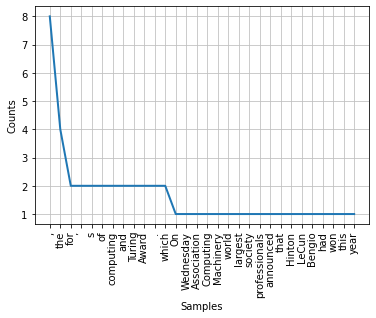

In [11]:
import matplotlib.pyplot as plt
fd.plot(30, cumulative=False)
plt.show()

<FreqDist with 41 samples and 387 outcomes>


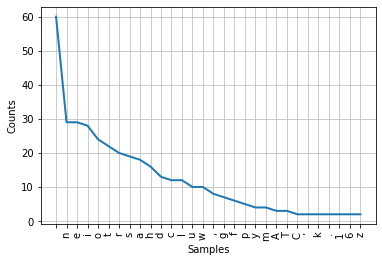

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [12]:
fd_alpha = FreqDist(text)
print(fd_alpha)
fd_alpha.plot(30, cumulative=False)

# Chapter 7 - Collaborative Analytics with Plotly

## Segment 1 - Creating basic charts

### Setting up to use Plotly within Jupyter

In [13]:
! pip install Plotly

In [15]:
! pip install cufflinks

In [18]:
pip install cufflinks

  Using cached cufflinks-0.17.3.tar.gz (81 kB)

  Using cached plotly-5.1.0-py2.py3-none-any.whl (20.6 MB)
  Using cached colorlover-0.3.0-py3-none-any.whl (8.9 kB)
  Using cached ipywidgets-7.6.3-py2.py3-none-any.whl (121 kB)
  Using cached tenacity-8.0.1-py3-none-any.whl (24 kB)
  Using cached widgetsnbextension-3.5.1-py2.py3-none-any.whl (2.2 MB)
  Using cached jupyterlab_widgets-1.0.0-py3-none-any.whl (243 kB)
Using legacy 'setup.py install' for cufflinks, since package 'wheel' is not installed.
    Running setup.py install for cufflinks: started
    Running setup.py install for cufflinks: finished with status 'done'


In [22]:
! pip install chart_studio

In [31]:
pip install chart-studio

  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
  Using cached retrying-1.3.3.tar.gz (10 kB)
Using legacy 'setup.py install' for retrying, since package 'wheel' is not installed.
    Running setup.py install for retrying: started
    Running setup.py install for retrying: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


In [78]:
import numpy as np
import pandas as pd

import cufflinks as cf

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objs as go

In [79]:
tls.set_credentials_file(username='bigdatagal', api_key='mZYh00DUU4x31bnTDgLi')

## Creating line charts

### A very basic line chart

In [80]:
a = np.linspace(start=0, stop=36, num=36)
np.random.seed(25)
b = np.random.uniform(low=0.0, high=1.0, size=36)
trace = go.Scatter(x=a, y=b)
data=[trace]
py.iplot(data, filename="basic-line-c")

PlotlyRequestError: Bad API key

### A line chart with more than one variable plotted

In [81]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

df = cars[['cyl', 'wt', 'mpg']]

layout = dict(title='Chart from Pandas DataFrame', xaxis=dict(title='x-axis'), yaxis=dict(title='y-axis'))
df.iplot(filename='cf-simple-line-chart', layout=layout)

PlotlyRequestError: Bad API key

## Creating bar charts

In [ ]:
data = [go.Bar(x=[1,2,3,4,5,6,7,8,9,10], y=[1,2,3,4,0.5,4,3,2,1])]
print(data)

In [ ]:
layout = dict(title='Simple Bar Chart', xaxis = dict(title='x-axis'), yaxis=dict(title='y-axis'))
py.iplot(data, filename='basic-bar-chart', layout=layout)

## Creating pie charts

In [ ]:
fig = {'data':[{'labels':['bicycle', 'motorcycle', 'car', 'van', 'stroller'],
                 'values':[1,2,3,4,0.5],
                'type':'pie'}],
      'layout':{'title':'Simple Pie Chart'}}
py.iplot(fig)

## Segment 2 - Craeting statistical charts

In [77]:
import numpy as np
import pandas as pd

import cufflinks as cf

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.graph_objs as go

import sklearn
from sklearn.preprocessing import StandardScaler

In [82]:
tls.set_credentials_file(username='bigdatagal', api_key='mZYh00DUU4x31bnTDgLi')

## Creating histograms

### Make a histogram from a pandas series object

In [84]:
address = 'C:/Users/User/Exercise Files/Data/mtcars.csv'
cars = pd.read_csv(address)

cars.columns = ['car_names', 'mpg', 'cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb']

mpg = cars.mpg

mpg.iplot(kind='histogram', filename='simple-histogram-chart')

PlotlyRequestError: Bad API key

In [88]:
cars_subset = cars[['mpg', 'disp', 'hp']]

cars_data_std = StandardScaler().fit_transform(cars_subset)

cars_select = pd.DataFrame(cars_data_std)
cars_select.columns = ['mpg', 'disp', 'hp']

cars_select.iplot(kind='histogram', filename = 'muliple-histogram-chart')

PlotlyRequestError: Bad API key

In [94]:
cars_select.iplot(kind='histogram', subplots=True ,filename = 'subplot-histograms')

PlotlyRequestError: Bad API key

In [93]:
cars_select.iplot(kind='histogram', subplots=True, shape=(3,1), filename = 'muliple-histogram-chart')

PlotlyRequestError: Bad API key

In [92]:
cars_select.iplot(kind='histogram', subplots=True, shape=(1,3), filename = 'muliple-histogram-chart')

PlotlyRequestError: Bad API key

## Creating box plots

In [95]:
cars_select.iplot(kind='box', filename = 'box-plots')

PlotlyRequestError: Bad API key

## Creating Scatter Plot

In [96]:
fig = {'data':[{'x':cars_select.mpg, 'y':cars_select.disp, 'mode':'markers', 'name':'mpg'},
              {'x':cars_select.hp, 'y':cars_select.disp, 'mode':'markers', 'name':hp}],
      'layout':{'xaxis':{'title':''}, 'yaxis':{'title':'Standardized Displacement'}}}
py.iplot(fig, filename = 'grouped-scatter-plot')

NameError: name 'hp' is not defined